# Guía de Trabajos Prácticos N°1



## 1. **Objetivos**  
   - Introducir conceptos básicos de aprendizaje automático.  
   - Conocer los principales aspectos de implementación práctica de diversos algoritmos de reconocimiento de patrones.  
   - Estudiar y validar su comportamiento con algunos ejercicios de "lápiz y papel" y sobre conjuntos de datos artificiales sencillos.



## 2. **Ejercicios**  



   ### **Ejercicio 1: Introducción y repaso de probabilidad y teoría de información.** *italicized text*

   

Escriba un programa para generar números aleatorios $x$ con una función de densidad de probabilidad ($fdp$) gaussiana N($\mu$, $\Sigma$) en $d$ dimensiones.

#### **1. Para cada uno de los siguientes casos:** i) fdp gaussiana 1D; ii) fdp gaussiana 2D no correlacionada; y iii) fdp gaussiana 2D correlacionada:
      
      a) Genere un conjunto de números aleatorios con esa fdp.  
      b) Estime la fdp experimental mediante un histograma normalizado.  
      c) Compare gráficamente la estimación obtenida con la $fdp$ teórica.  


Se implementa la generación de números aleatorios usando una función de densidad de probabilidad (fdp) gaussiana, que está definida por su media $\mu$ y su matriz de covarianza $\Sigma$.

- la fdp gaussiana 1D tiene una sola variable con una media $\mu$ y una desviación estándar $\sigma$.
- fdp gaussiana 2D no correlacionada: Se generan dos variables aleatorias independientes con su propia media y varianza, pero sin correlación.
- fdp gaussiana 2D correlacionada: Similar al caso 2D no correlacionado, pero las variables están correlacionadas, lo que implica una matriz de covarianza con términos no nulos fuera de la diagonal.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Configuración para reproducir los resultados
np.random.seed(42)

**Función para generar números aleatorios y estimar fdp**

In [ ]:
# Función para generar datos según una fdp gaussiana
def generar_datos_gaussianos(mu, sigma, n):
    return np.random.normal(mu, sigma, n)

# Función para generar datos multivariados en varias dimensiones
def generar_datos_gaussianos_multivariados(mu, cov, n):
    return np.random.multivariate_normal(mu, cov, n)

# Función para graficar el histograma normalizado y la fdp teórica
def graficar_histograma_vs_fdp(data, bins, fdp_teorica, xlabel, ylabel, title):
    plt.hist(data, bins=bins, density=True, alpha=0.6, color='g', label="Histograma")

    # Graficar la fdp teórica
    x = np.linspace(min(data), max(data), 100)
    plt.plot(x, fdp_teorica(x), 'r', label="FDP Teórica")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

##### **Caso unidimensional**

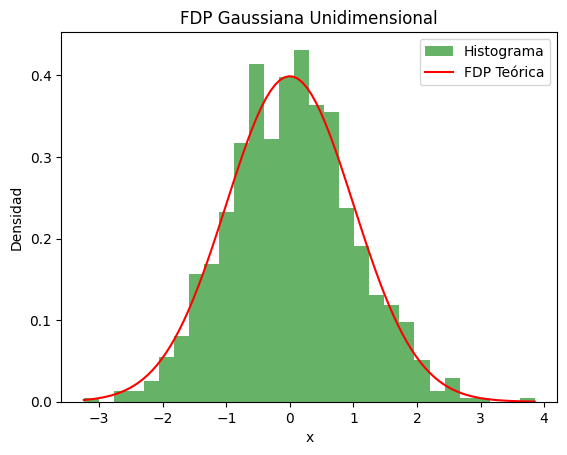

In [ ]:
# Parámetros para la distribución gaussiana unidimensional
mu = 0
sigma = 1
n = 1000

# Generar datos unidimensionales
datos_uni = generar_datos_gaussianos(mu, sigma, n)

# Estimar la fdp teórica unidimensional
fdp_teorica_uni = lambda x: (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Graficar
graficar_histograma_vs_fdp(datos_uni, bins=30, fdp_teorica=fdp_teorica_uni, xlabel="x", ylabel="Densidad", title="FDP Gaussiana Unidimensional")

##### **Caso bidimensional no correlacionado**

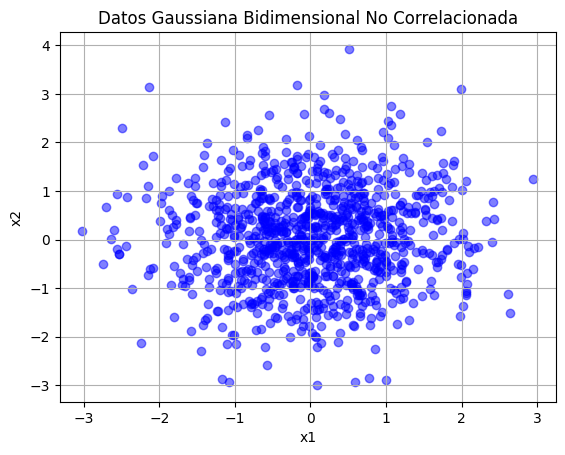

In [ ]:
# Parámetros para la distribución gaussiana bidimensional no correlacionada
mu_bi = [0, 0]
cov_bi_no_corr = [[1, 0], [0, 1]]  # Matriz de covarianza diagonal (no correlacionada)
n = 1000

# Generar datos bidimensionales
datos_bi_no_corr = generar_datos_gaussianos_multivariados(mu_bi, cov_bi_no_corr, n)

# Graficar los datos bidimensionales
plt.scatter(datos_bi_no_corr[:, 0], datos_bi_no_corr[:, 1], alpha=0.5, color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Datos Gaussiana Bidimensional No Correlacionada')
plt.grid(True)
plt.show()

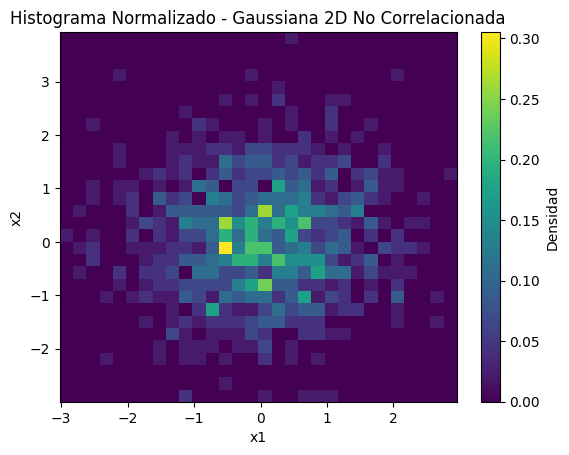

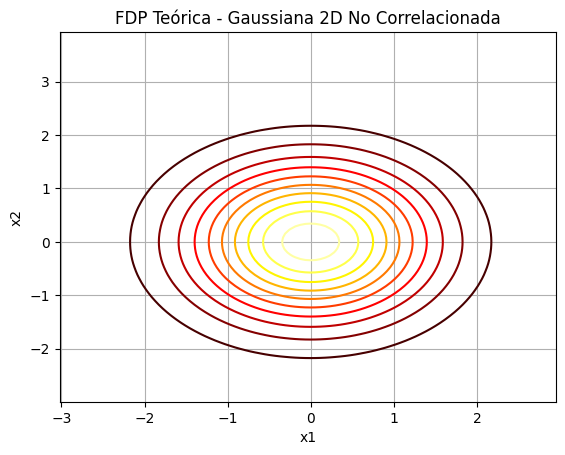

In [ ]:
# Definir el rango de los ejes para el histograma bidimensional
x_min, x_max = min(datos_bi_no_corr[:, 0]), max(datos_bi_no_corr[:, 0])
y_min, y_max = min(datos_bi_no_corr[:, 1]), max(datos_bi_no_corr[:, 1])

# Generar un histograma bidimensional normalizado
histograma_bi_no_corr, xedges, yedges = np.histogram2d(datos_bi_no_corr[:, 0], datos_bi_no_corr[:, 1], bins=30, density=True)

# Graficar el histograma normalizado como un mapa de calor
plt.imshow(histograma_bi_no_corr.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='viridis')
plt.colorbar(label='Densidad')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Histograma Normalizado - Gaussiana 2D No Correlacionada')
plt.show()

# Definir la fdp teórica para el caso no correlacionado
x1, x2 = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
pos = np.dstack((x1, x2))
fdp_teorica_bi_no_corr = multivariate_normal(mu_bi, cov_bi_no_corr)

# Graficar la fdp teórica
plt.contour(x1, x2, fdp_teorica_bi_no_corr.pdf(pos), levels=10, cmap='hot')
plt.title("FDP Teórica - Gaussiana 2D No Correlacionada")
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()


* Usamos `np.histogram2d` para generar un histograma 2D de los datos en los casos 2D. La opción `density=True` nos asegura que el histograma esté normalizado.
   
* Para comparar el histograma experimental con la fdp teórica, graficamos el histograma bidimensional como un mapa de calor y luego utilizamos la función `contour` para superponer la $fdp$ teórica calculada con `multivariate_normal` de `scipy.stats`.

##### **Caso 2D correlacionado**

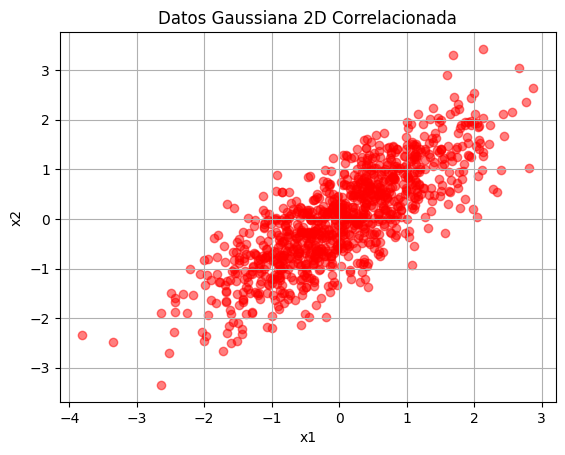

In [ ]:
# Parámetros para la distribución gaussiana bidimensional correlacionada
mu_bi_corr = [0, 0]
cov_bi_corr = [[1, 0.8], [0.8, 1]]  # Matriz de covarianza con correlación
n = 1000

# Generar datos 2D
datos_bi_corr = generar_datos_gaussianos_multivariados(mu_bi_corr, cov_bi_corr, n)

# Graficar los datos 2D correlacionados
plt.scatter(datos_bi_corr[:, 0], datos_bi_corr[:, 1], alpha=0.5, color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Datos Gaussiana 2D Correlacionada')
plt.grid(True)
plt.show()

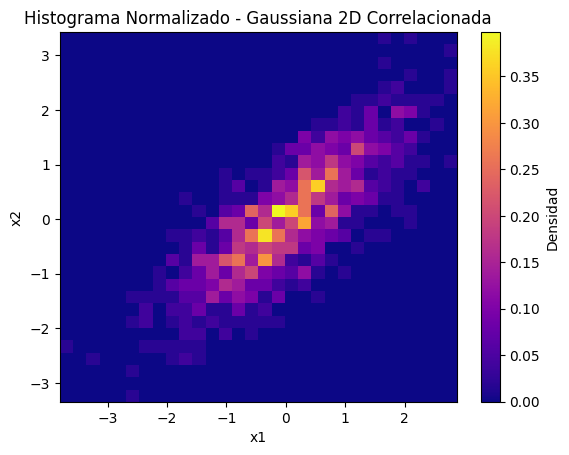

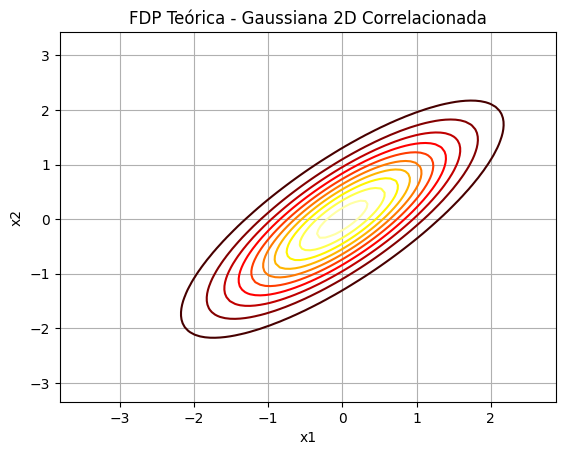

In [ ]:
# Definir el rango de los ejes para el histograma bidimensional
x_min_corr, x_max_corr = min(datos_bi_corr[:, 0]), max(datos_bi_corr[:, 0])
y_min_corr, y_max_corr = min(datos_bi_corr[:, 1]), max(datos_bi_corr[:, 1])

# Generar un histograma bidimensional normalizado
histograma_bi_corr, xedges_corr, yedges_corr = np.histogram2d(datos_bi_corr[:, 0], datos_bi_corr[:, 1], bins=30, density=True)

# Graficar el histograma normalizado como un mapa de calor
plt.imshow(histograma_bi_corr.T, origin='lower', extent=[xedges_corr[0], xedges_corr[-1], yedges_corr[0], yedges_corr[-1]], aspect='auto', cmap='plasma')
plt.colorbar(label='Densidad')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Histograma Normalizado - Gaussiana 2D Correlacionada')
plt.show()

# Definir la fdp teórica para el caso correlacionado
x1_corr, x2_corr = np.meshgrid(np.linspace(x_min_corr, x_max_corr, 100), np.linspace(y_min_corr, y_max_corr, 100))
pos_corr = np.dstack((x1_corr, x2_corr))
fdp_teorica_bi_corr = multivariate_normal(mu_bi_corr, cov_bi_corr)

# Graficar la fdp teórica
plt.contour(x1_corr, x2_corr, fdp_teorica_bi_corr.pdf(pos_corr), levels=10, cmap='hot')
plt.title("FDP Teórica - Gaussiana 2D Correlacionada")
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()


#### **2. Compruebe numéricamente el teorema del límite central mediante la suma de números aleatorios con distribución uniforme.**

El **Teorema del Límite Central** establece que, bajo ciertas condiciones, la suma (o el promedio) de una gran cantidad de variables aleatorias independientes e idénticamente distribuidas (i.i.d.) con varianza finita, tiende a seguir una distribución normal, independientemente de la distribución original de las variables. Se demuestra numéricamente el TLC utilizando números aleatorios generados a partir de una distribución uniforme, y observando cómo la suma de un número creciente de estos números tiende a una distribución gaussiana.

Pasos a seguir:

1. Generar $N$ muestras aleatorias de una distribución uniforme entre [0, 1].
2. Calcular la suma de $m$ números aleatorios (donde $m$ es el tamaño de la muestra) para distintos valores de $m$.
3. Graficar el histograma de las sumas para diferentes valores de $m$ y observar cómo la distribución resultante se aproxima a una distribución normal a medida que aumenta $m$.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

**Función para demostrar el Teorema del Límite Central**

In [ ]:
# Función para calcular la suma de n muestras aleatorias con distribución uniforme
def tlc_uniforme(num_muestras, num_sumas):
    # Generar un conjunto de números aleatorios con distribución uniforme entre 0 y 1
    muestras = np.random.uniform(0, 1, (num_sumas, num_muestras))

    # Sumar las muestras en cada fila
    sumas = np.sum(muestras, axis=1)

    return sumas

**Simulación del Teorema del Límite Central**

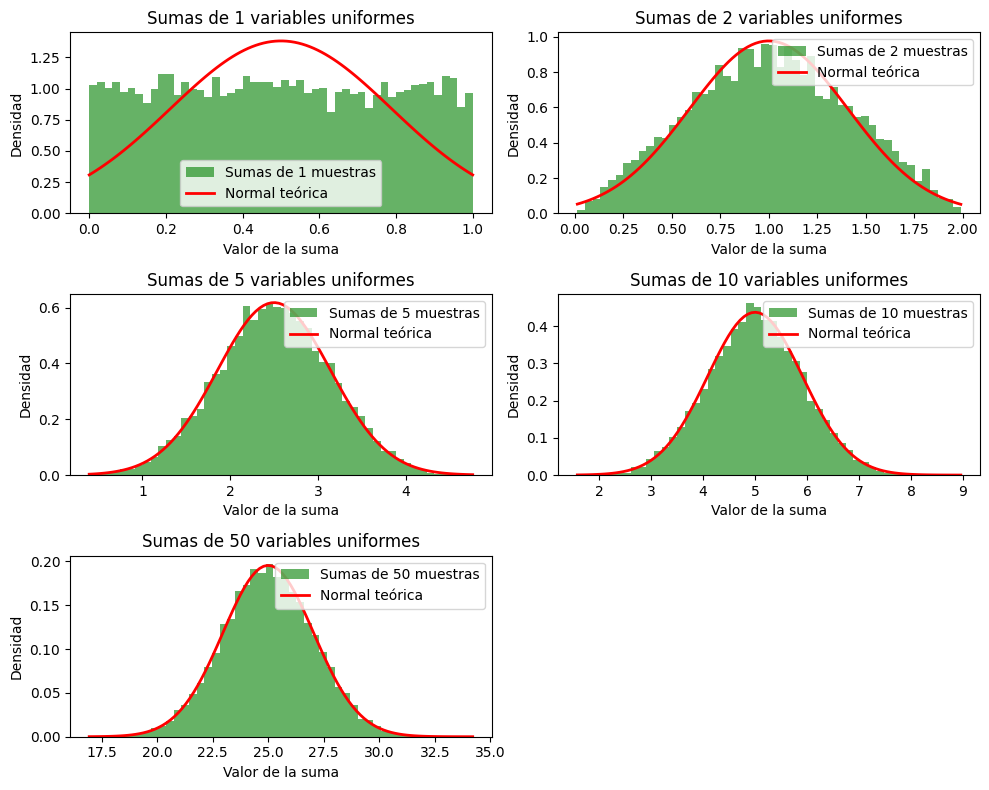

In [ ]:
# Parámetros de la simulación
num_sumas = 10000  # Número de sumas (tamaño del conjunto)
valores_m = [1, 2, 5, 10, 50]  # Valores de m para mostrar el efecto del TLC

# Graficar las distribuciones para diferentes valores de m
plt.figure(figsize=(10, 8))
for i, m in enumerate(valores_m):
    sumas = tlc_uniforme(m, num_sumas)

    # Graficar el histograma de las sumas
    plt.subplot(3, 2, i+1)
    plt.hist(sumas, bins=50, density=True, alpha=0.6, color='g', label=f'Sumas de {m} muestras')

    # Superponer la distribución normal teórica
    media_teorica = m * 0.5  # Media de la distribución uniforme es 0.5
    sigma_teorica = np.sqrt(m * 1/12)  # Varianza de la distribución uniforme es 1/12
    x = np.linspace(min(sumas), max(sumas), 100)
    plt.plot(x, norm.pdf(x, media_teorica, sigma_teorica), 'r-', lw=2, label='Normal teórica')

    plt.title(f'Sumas de {m} variables uniformes')
    plt.xlabel('Valor de la suma')
    plt.ylabel('Densidad')
    plt.legend()

plt.tight_layout()
plt.show()



*    **Generación de muestras**: Se utiliza `np.random.uniform(0, 1, (num_sumas, num_muestras))` para generar un conjunto de números aleatorios uniformes en el rango [0, 1]. Luego, la función `np.sum` se utiliza para sumar las $m$ muestras.

*   **Comparación gráfica**: Para cada valor de $m$ (número de variables sumadas), se grafica un histograma normalizado de las sumas, lo que representa la distribución experimental. Además, se superpone una curva de la distribución normal teórica con los parámetros calculados a partir de la media y la varianza de la distribución uniforme.

* **Teorema del Límite Central**: A medida que $m$ aumenta, el histograma de las sumas tiende a una distribución normal, lo que demuestra numéricamente el TLC.

#### **3. Estime numéricamente y compare con el valor teórico, la entropía de una variable aleatoria con distribución: i) laplaciana; ii) gaussiana y iii) uniforme.**

La **entropía** de una variable aleatoria mide la incertidumbre asociada con su distribución de probabilidad. Matemáticamente, para una variable aleatoria continua con una función de densidad de probabilidad ($fdp$) $p(x)$, la entropía $H$ se define como:

$$ H = -\int p(x) \log(p(x)) dx $$


Queremos calcular y comparar la entropía de tres distribuciones diferentes: laplaciana, gaussiana y uniforme.

- **Distribución Laplaciana**: También conocida como doble exponencial, tiene una $fdp$ $$ p(x) = \frac{1}{2b} \exp\left(-\frac{|x-\mu|}{b}\right) $$.
- **Distribución Gaussiana**: Sigue una $fdp$ $$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$.
- **Distribución Uniforme**: Para una variable $x$ en el intervalo \([a, b]\), la $fdp$ es $$ p(x) = \frac{1}{b-a} $$ dentro del intervalo, y 0 fuera de él.

Lo que resta es calcular la entropía numéricamente y comparar los resultados con los valores teóricos conocidos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace, norm, uniform
from scipy.integrate import quad

**Funciones teóricas para la entropía**

In [ ]:
# Entropía teórica para la distribución laplaciana
def entropia_laplaciana(b):
    return 1 + np.log(2 * b)

# Entropía teórica para la distribución gaussiana
def entropia_gaussiana(sigma):
    return 0.5 * (1 + np.log(2 * np.pi * sigma**2))

# Entropía teórica para la distribución uniforme
def entropia_uniforme(a, b):
    return np.log(b - a)


**Cálculo de la entropía numérica mediante integración**

In [ ]:
# Función para calcular la entropía numérica
def calcular_entropia_numerica(fdp, rango):
    integrando = lambda x: -fdp(x) * np.log(fdp(x))
    entropia, _ = quad(integrando, rango[0], rango[1])
    return entropia

**Distribuciones y estimación de la entropía**

##### 1. **Distribución Laplaciana**

In [ ]:
# Parámetros de la distribución laplaciana
mu_lap = 0
b_lap = 1

# Definir la fdp de la laplaciana
fdp_laplace = lambda x: laplace.pdf(x, mu_lap, b_lap)

# Calcular entropía numérica
entropia_numerica_laplace = calcular_entropia_numerica(fdp_laplace, [-10, 10])

# Calcular entropía teórica
entropia_teorica_laplace = entropia_laplaciana(b_lap)

print(f"Entropía numérica Laplaciana: {entropia_numerica_laplace}")
print(f"Entropía teórica Laplaciana: {entropia_teorica_laplace}")

Entropía numérica Laplaciana: 1.6926163124992457
Entropía teórica Laplaciana: 1.6931471805599454


##### 2. **Distribución Gaussiana**


In [ ]:
# Parámetros de la distribución gaussiana
mu_gauss = 0
sigma_gauss = 1

# Definir la fdp de la gaussiana
fdp_gaussiana = lambda x: norm.pdf(x, mu_gauss, sigma_gauss)

# Calcular entropía numérica
entropia_numerica_gaussiana = calcular_entropia_numerica(fdp_gaussiana, [-10, 10])

# Calcular entropía teórica
entropia_teorica_gaussiana = entropia_gaussiana(sigma_gauss)

print(f"Entropía numérica Gaussiana: {entropia_numerica_gaussiana}")
print(f"Entropía teórica Gaussiana: {entropia_teorica_gaussiana}")

Entropía numérica Gaussiana: 1.418938533204673
Entropía teórica Gaussiana: 1.4189385332046727


##### 3. **Distribución Uniforme**


In [ ]:
# Parámetros de la distribución uniforme
a_unif = -1
b_unif = 1

# Definir la fdp de la uniforme
fdp_uniforme = lambda x: uniform.pdf(x, a_unif, b_unif - a_unif)

# Calcular entropía numérica
entropia_numerica_uniforme = calcular_entropia_numerica(fdp_uniforme, [a_unif, b_unif])

# Calcular entropía teórica
entropia_teorica_uniforme = entropia_uniforme(a_unif, b_unif)

print(f"Entropía numérica Uniforme: {entropia_numerica_uniforme}")
print(f"Entropía teórica Uniforme: {entropia_teorica_uniforme}")

Entropía numérica Uniforme: 0.6931471805599453
Entropía teórica Uniforme: 0.6931471805599453



1. **Entropía teórica**: Se definen las funciones que calculan la entropía teórica para cada distribución.
2. **Cálculo numérico**: Se utiliza el método de integración numérica `scipy.integrate.quad` para calcular la entropía numérica, evaluando la integral de $-p(x) \log(p(x))$ en el rango adecuado para cada distribución.
3. **Distribuciones**:
   - Para la **distribución laplaciana**, se especifica la media $\mu$ y el parámetro de escala $b$.
   - Para la **distribución gaussiana**, se usa la media $\mu$ y la desviación estándar $\sigma$.
   - Para la **distribución uniforme**, el intervalo es $[a, b]$.

- **Entropía teórica Laplaciana**: $ H = 1 + \ln(2b) $.
- **Entropía teórica Gaussiana**: $ H = \frac{1}{2}(1 + \ln(2\pi\sigma^2)) $.
- **Entropía teórica Uniforme**: $ H = \ln(b - a) $.


### **Ejercicio 2: Clasificación estadística de patrones.**

#### 1. Sea un clasificador geométrico lineal definido por:
$$ g_1(x) = −x_1 $$
$$ g_2(x) = x_1 + x_2 − 1 $$
$$ g_3(x) = x_1 − x_2 − 1 $$

##### a) Calcule y grafique las fronteras y regiones de decisión.

Cada una de las funciones $g_i(x)$ define una frontera de decisión lineal en el espacio de las características. Las regiones de decisión se determinan evaluando en qué región del espacio de características cada una de estas funciones **toma un valor mayor que las demás**.

Para determinar las fronteras de decisión, necesitamos igualar las funciones, lo que nos dará las ecuaciones de las rectas que separan las regiones. Estas fronteras nos permiten visualizar cómo se dividen los puntos en el espacio de características $x_1$ y $x_2$.

Las ecuaciones de las fronteras entre las clases se obtienen igualando los clasificadores:

 $$ g_1(x) = g_2(x) $$
 $$ g_1(x) = g_3(x) $$
 $$ g_2(x) = g_3(x) $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definimos las funciones g1, g2 y g3
def g1(x1, x2):
    return -x1

def g2(x1, x2):
    return x1 + x2 - 1

def g3(x1, x2):
    return x1 - x2 - 1

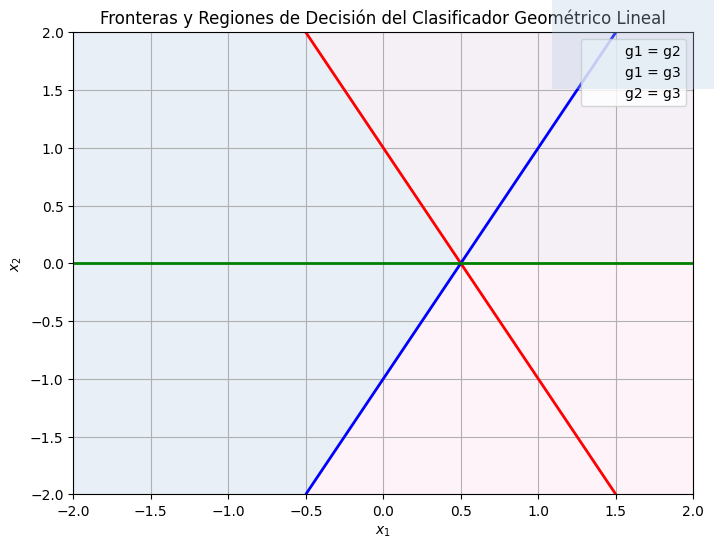

In [ ]:
# Crear una malla de puntos (x1, x2) para evaluar las funciones
x1_vals = np.linspace(-2, 2, 400)
x2_vals = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Evaluar las funciones en cada punto de la malla
G1 = g1(X1, X2)
G2 = g2(X1, X2)
G3 = g3(X1, X2)

# Encontrar las fronteras de decisión igualando los clasificadores
plt.figure(figsize=(8, 6))

# Frontera entre g1 y g2: g1(x) = g2(x)
plt.contour(X1, X2, G1 - G2, levels=[0], colors='red', linewidths=2)#, label="g1 = g2")

# Frontera entre g1 y g3: g1(x) = g3(x)
plt.contour(X1, X2, G1 - G3, levels=[0], colors='blue', linewidths=2)#, label="g1 = g3")

# Frontera entre g2 y g3: g2(x) = g3(x)
plt.contour(X1, X2, G2 - G3, levels=[0], colors='green', linewidths=2)#, label="g2 = g3")

# Colorear las regiones de decisión
region = np.argmax(np.stack([G1, G2, G3]), axis=0)
plt.contourf(X1, X2, region, alpha=0.3, levels=3, cmap='Pastel1')

# Establecer etiquetas y título
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Fronteras y Regiones de Decisión del Clasificador Geométrico Lineal")
plt.grid(True)
plt.legend(['g1 = g2', 'g1 = g3', 'g2 = g3'])
plt.show()

* **Definición de las funciones**: Las tres funciones $g_1(x), g_2(x)$ y $g_3(x)$ se definen como funciones Python que dependen de las variables $x_1$ y $x_2$.
   
* **Evaluación en la malla**: Se crea una malla de puntos en el plano de $x_1$ y $x_2$, y las funciones se evalúan en cada punto de esta malla para obtener las fronteras de decisión.

* **Fronteras de decisión**: Las fronteras se determinan igualando las funciones entre sí y utilizando `plt.contour` para graficar las líneas correspondientes a esas fronteras.

* **Colorear las regiones**: Utilizando `np.argmax`, se determina la región donde cada función toma el valor máximo, y se colorean las regiones resultantes para visualizar las áreas donde cada función es dominante.

* **Visualización**: Se muestran las fronteras en diferentes colores (rojo, azul y verde), junto con las regiones de decisión en colores suaves, lo que permite ver claramente cómo se divide el espacio en función de las fronteras definidas por el clasificador.

##### b) Clasifique los puntos: $(2,1); (2,-1); (-1,1); (-1,-1)$.

Cada punto se clasificará en la región donde la función $g_i(x)$ tome el valor más grande. Evaluamos cada una de las funciones en los puntos dados y determinamos qué función es la mayor para cada punto.



In [ ]:
# Definimos los puntos a clasificar
puntos = [(2, 1), (2, -1), (-1, 1), (-1, -1)]

# Función para clasificar un punto basado en el clasificador geométrico
def clasificar_punto(x1, x2):
    g1_val = g1(x1, x2)
    g2_val = g2(x1, x2)
    g3_val = g3(x1, x2)

    # Obtener el índice de la función con el valor más grande
    valores = [g1_val, g2_val, g3_val]
    indice = np.argmax(valores) + 1  # Sumar 1 para que el índice coincida con g1, g2, g3
    return indice

# Clasificar los puntos
for punto in puntos:
    x1, x2 = punto
    clase = clasificar_punto(x1, x2)
    print(f"El punto {punto} pertenece a la clase g{clase}")

El punto (2, 1) pertenece a la clase g2
El punto (2, -1) pertenece a la clase g3
El punto (-1, 1) pertenece a la clase g1
El punto (-1, -1) pertenece a la clase g1


1. **Función de clasificación**: Para cada punto, calculamos el valor de $g_1(x), g_2(x), g_3(x)$, y seleccionamos la función que tiene el valor más alto.
   
2. **Clasificación de los puntos**: Se evalúan los puntos $(2,1), (2,-1), (-1,1)$, y $(-1,-1)$, y se determina a cuál clase pertenece cada uno, según qué función tenga el valor más alto.

**Resultados de la clasificación:**

1. Para el punto $(2, 1)$:
   - $g_1(2, 1) = -2$
   -  $g_2(2, 1) = 2$
   -  $g_3(2, 1) = 0$
   - La clase mayor es  $g_2$ , por lo tanto, el punto pertenece a la clase **g2**.

2. Para el punto $(2, -1)$:
   -  $g_1(2, -1) = -2$
   -  $g_2(2, -1) = 0$
   -  $g_3(2, -1) = 2$
   - La clase mayor es $g_3$, por lo tanto, el punto pertenece a la clase **g3**.

3. Para el punto  $(-1, 1)$:
   -  $g_1(-1, 1) = 1$
   -  $g_2(-1, 1) = -1$
   -  $g_3(-1, 1) = -3$
   - La clase mayor es $g_1$ , por lo tanto, el punto pertenece a la clase **g1**.

4. Para el punto  $(-1, -1)$:
   -  $g_1(-1, -1) = 1$
   -  $g_2(-1, -1) = -3$
   -  $g_3(-1, -1) = -1$
   - La clase mayor es  $g_1$ , por lo tanto, el punto pertenece a la clase **g1**.

#### 2. Sean A y B dos clases de igual probabilidad a priori definidas por:

Sea un clasificador bayesiano con dos clases $A$ y $B$, ambas con distribuciones gaussianas (normales) multivariadas con igual probabilidad a priori, definidas por las siguientes distribuciones condicionales:


$$ P(x|A) \sim N\left( \mu_A = \begin{pmatrix} 3 \\ 0 \end{pmatrix}, \Sigma_A = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \right) $$


$$ P(x|B) \sim N\left( \mu_B = \begin{pmatrix} 0 \\ 3 \end{pmatrix}, \Sigma_B = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \right) $$



##### a) Construcción de un clasificador gaussiano y cálculo de la frontera de decisión
Dado que las dos clases tienen igual probabilidad a priori y las matrices de covarianza son idénticas $\Sigma_A = \Sigma_B$, la frontera de decisión se puede obtener de esta manera:

* **Función discriminante gaussiana**: En el caso en que las matrices de covarianza son iguales, el clasificador lineal óptimo se reduce a una comparación de las distancias cuadráticas entre el punto $x$ y los vectores de media $\mu_A$ y $\mu_B$.

La regla de decisión es asignar $x$ a la clase $A$ si:

$$ (x - \mu_A)^T \Sigma^{-1} (x - \mu_A) < (x - \mu_B)^T \Sigma^{-1} (x - \mu_B)
$$

Dado que $\Sigma_A = \Sigma_B = I$ (matriz identidad), podemos simplificar esto a:

$$ (x - \mu_A)^T (x - \mu_A) < (x - \mu_B)^T (x - \mu_B) $$

Esto significa que comparamos las distancias euclidianas de $x$ a $\mu_A$ y $\mu_B$.

* **Frontera de decisión**: La frontera de decisión está definida por los puntos $x$ que son equidistantes a los dos centros de las distribuciones gaussianas $\mu_A$ y $\mu_B$. Esto da lugar a una recta que biseca el segmento que une $\mu_A$ y $\mu_B$.

El punto medio entre $\mu_A = (3, 0)$ y $\mu_B = (0, 3)$ es:

$$
\text{Punto medio} = \left( \frac{3 + 0}{2}, \frac{0 + 3}{2} \right) = (1.5, 1.5)
$$

La dirección de la frontera es perpendicular al segmento que une $\mu_A$ y $\mu_B$, y la ecuación de la recta que une $\mu_A$ y $\mu_B$ es:

$$
(x_1 - 1.5) = -(x_2 - 1.5)
$$

o, en forma explícita:

$$
x_1 + x_2 = 3 \Rightarrow x_2 = 3 - x_1
$$

Ahora podemos calcular una recta perpendicular que pase por $(1.5, 1.5)$, y la frontera decisión queda:

$$ x_2 = x_1 $$





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Medias de las clases A y B
mu_A = np.array([3, 0])
mu_B = np.array([0, 3])

# Matriz de covarianza (identidad para ambas clases)
sigma = np.array([[1, 0], [0, 1]])

# Crear la distribución multivariada
gaussian_A = multivariate_normal(mean=mu_A, cov=sigma)
gaussian_B = multivariate_normal(mean=mu_B, cov=sigma)




##### b) **Grafica de las distribuciones y la frontera de decisión**

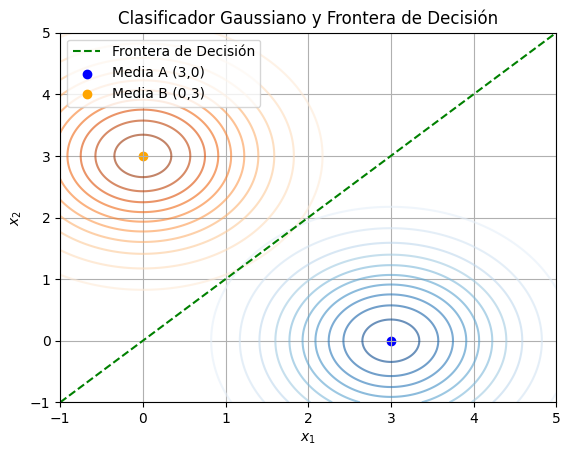

In [ ]:
# Crear una malla de puntos
x, y = np.linspace(-1, 5, 500), np.linspace(-1, 5, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Evaluar las distribuciones en cada punto de la malla
Z_A = gaussian_A.pdf(pos)
Z_B = gaussian_B.pdf(pos)

# Graficar las distribuciones
plt.contour(X, Y, Z_A, levels=10, cmap="Blues", alpha=0.6)#, label="P(x|A)")
plt.contour(X, Y, Z_B, levels=10, cmap="Oranges", alpha=0.6)#, label="P(x|B)")

# Graficar la frontera de decisión: x1 = x2
plt.plot(x, x, 'g--', label="Frontera de Decisión")

# Graficar las medias de las clases
plt.scatter(mu_A[0], mu_A[1], color='blue', marker='o', label="Media A (3,0)")
plt.scatter(mu_B[0], mu_B[1], color='orange', marker='o', label="Media B (0,3)")

# Etiquetas y leyenda
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Clasificador Gaussiano y Frontera de Decisión')
plt.legend()
plt.grid(True)
plt.show()



* **Distribuciones Gaussianas**: Se definen las medias $\mu_A$ y $\mu_B$, y las matrices de covarianza (identidad) para ambas clases. Utilizamos la función `multivariate_normal` de `scipy.stats` para definir las distribuciones gaussianas.

* **Malla de puntos**: Se crea una malla de puntos en el espacio $x_1$ y $x_2$ para evaluar las distribuciones gaussianas en cada punto de la malla.

* **Frontera de decisión**: La ecuación de la frontera de decisión $x_1 = x_2$ se grafica como una línea discontinua verde.

* **Visualización**: Se grafican las curvas de nivel de las distribuciones gaussianas para las clases $A$ y $B$, junto con la frontera de decisión y las medias de las distribuciones.



- La frontera de decisión será la línea recta $x_1 = x_2$, que divide el espacio en dos regiones. Esta frontera es perpendicular al segmento que une $\mu_A = (3, 0)$ y $\mu_B = (0, 3)$.
- Los puntos a un lado de esta frontera serán clasificados como pertenecientes a la clase $A$, y los puntos al otro lado serán clasificados como pertenecientes a la clase $B$.


#### 3. Implemente un clasificador gaussiano por ML para el mini-corpus de muestras proporcionado, realizando una representación gráfica de la situación:

##### a) Construcción de un clasificador gaussiano y cálculo de la frontera de decisión

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the minicorpus.csv file to check its contents
file_path = '/content/drive/MyDrive/doctorado/tesam/tp1/minicorpus.csv'
minicorpus = pd.read_csv(file_path)

# Display the first few rows of the dataset
minicorpus.head()


,2.6019200e+00,1.3349600e+00,1.0000000e+00
0,1.148570,0.586414,1.0
1,1.092540,1.005620,1.0
2,-0.542435,0.084336,1.0
3,0.188127,1.088590,1.0
4,1.471100,1.705210,1.0


In [ ]:
# It appears that the column names might not be correctly interpreted, so we will fix the column names
minicorpus.columns = ['x', 'y', 'class']

# Display the first few rows again to verify the changes
minicorpus.head()


,x,y,class
0,1.148570,0.586414,1.0
1,1.092540,1.005620,1.0
2,-0.542435,0.084336,1.0
3,0.188127,1.088590,1.0
4,1.471100,1.705210,1.0


El archivo minicorpus.csv contiene tres columnas: las dos primeras representan las coordenadas xx y yy, y la tercera columna indica la clase a la que pertenece cada muestra, tomando valores 1, 2, 3 o 4.

Se implementa un clasificador gaussiano utilizando los datos proporcionados. Posteriormente, se calcula la tasa de aciertos en los datos de entrenamiento y se realiza una representación gráfica de las clases y las fronteras de decisión.

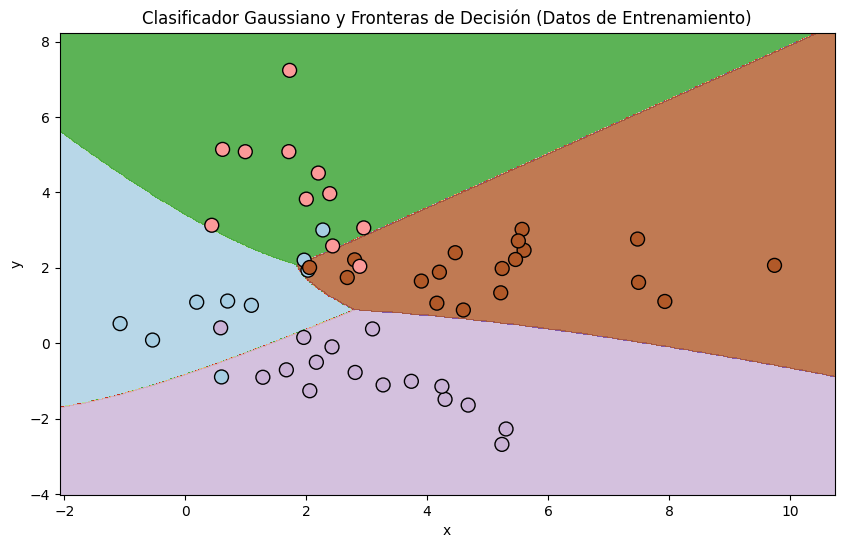

Tasa de aciertos en el conjunto de entrenamiento: 0.8888888888888888


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Separar las características (x, y) y las etiquetas (class)
X = minicorpus[['x', 'y']].values
y = minicorpus['class'].values

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear e implementar el clasificador Gaussiano
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de entrenamiento
y_train_pred = gnb.predict(X_train)

# Calcular la tasa de aciertos en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)

# Visualizar las fronteras de decisión y los puntos de entrenamiento
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Graficar los puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', s=100, cmap=plt.cm.Paired)

# Etiquetas y título
plt.title("Clasificador Gaussiano y Fronteras de Decisión (Datos de Entrenamiento)")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

train_accuracy
print(f"Tasa de aciertos en el conjunto de entrenamiento: {train_accuracy}")


La tasa de aciertos en el conjunto de entrenamiento utilizando el clasificador Gaussiano es del 88.89%. Además, la gráfica muestra las fronteras de decisión del clasificador y la clasificación de los puntos de entrenamiento.

##### b) **Generación de nuevos datos de prueba**

Ahora generaré nuevos datos de prueba a partir de los parámetros obtenidos del clasificador Gaussiano y los clasificaré para comparar los resultados con la tasa de aciertos en el conjunto de entrenamiento.

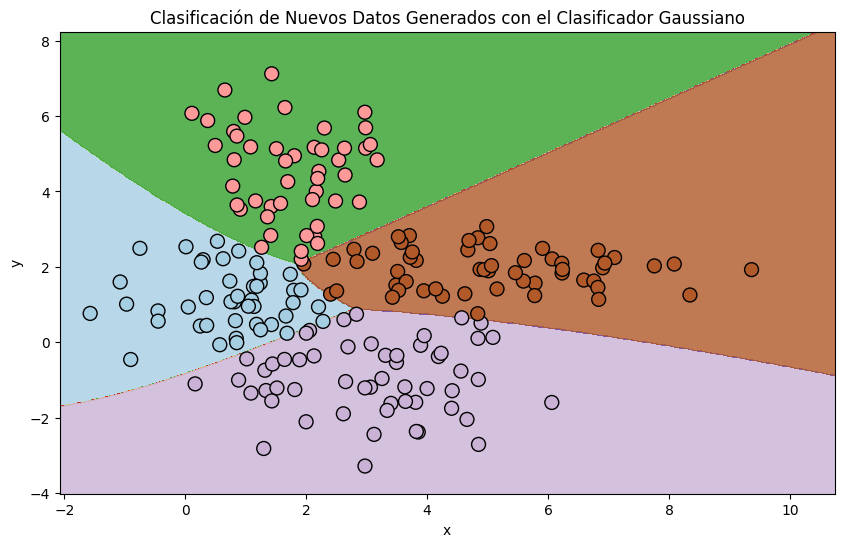

Porcentaje de aciertos en los nuevos datos generados: 85.5%
Porcentaje de aciertos en el conjunto de entrenamiento: 88.88888888888889%


In [ ]:
# Generar nuevos datos de prueba a partir de los parámetros obtenidos
nuevos_datos = np.random.multivariate_normal(gnb.theta_[0], np.diag(gnb.var_[0]), 50)
for i in range(1, 4):
    nuevos_datos = np.vstack([nuevos_datos, np.random.multivariate_normal(gnb.theta_[i], np.diag(gnb.var_[i]), 50)])

# Clasificar los nuevos datos de prueba
nuevas_clases = gnb.predict(nuevos_datos)

# Visualización de los nuevos datos clasificados
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Graficar los nuevos puntos clasificados
plt.scatter(nuevos_datos[:, 0], nuevos_datos[:, 1], c=nuevas_clases, edgecolor='k', marker='o', s=100, cmap=plt.cm.Paired)

# Etiquetas y título
plt.title("Clasificación de Nuevos Datos Generados con el Clasificador Gaussiano")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calcular las tasas de aciertos comparando con las clases originales (estimadas)
nuevos_datos_accuracy = accuracy_score(np.repeat([1, 2, 3, 4], 50), nuevas_clases)
print(f"Porcentaje de aciertos en los nuevos datos generados: {nuevos_datos_accuracy * 100}%")
print(f"Porcentaje de aciertos en el conjunto de entrenamiento: {train_accuracy * 100}%")


### **Ejercicio 3: Análisis estadístico de datos-PCA.**

Primero importo los datos de `iris.csv` para poder aplicarle el algoritmo PCA, una vez implementado.

In [ ]:
# Let's first load and inspect the provided CSV file to understand its structure.
import pandas as pd

# Load the file
file_path = '/content/drive/MyDrive/doctorado/tesam/tp1/iris.csv'
iris_df = pd.read_csv(file_path)

# Show the first few rows of the dataset to understand its structure
iris_df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### 1. Implementación del algoritmo PCA






**Análisis Principal de Componentes (PCA):** El PCA es un método de reducción dimensional que se basa en la transformación lineal de los datos para obtener las direcciones principales, es decir, los componentes principales. Esto se logra buscando las direcciones que maximizan la varianza en los datos y proyectando los datos en estas nuevas direcciones. Los pasos a seguir son:

* **Estandarización de los datos:**
   Los datos deben ser normalizados para que todas las características tengan la misma escala. La normalización se puede hacer restando la media y dividiendo por la desviación estándar:
   
   $$   X_{\text{norm}} = \frac{X - \mu}{\sigma} $$
   
   Donde $ \mu $ es el vector de medias y $ \sigma $ es el vector de desviaciones estándar.

* **Cálculo de la matriz de covarianza:**
   La matriz de covarianza describe la relación entre las características del conjunto de datos y es crucial para determinar las direcciones principales:
   
   $$    \Sigma = \frac{1}{n-1} X_{\text{norm}}^T X_{\text{norm}} $$
   
   Donde $ X_{\text{norm}} $ es la matriz de datos normalizados.

* **Cálculo de los vectores y valores propios:**
   Los vectores propios de la matriz de covarianza determinan las direcciones principales, mientras que los valores propios asociados determinan la magnitud de la varianza explicada por cada dirección.

* **Proyección de los datos:**
   Para reducir la dimensionalidad a $ k $ dimensiones, se seleccionan los $k$ vectores propios más grandes y se proyectan los datos en esas direcciones:
   
   $$    X_{\text{proyectado}} = X_{\text{norm}} W_k $$
   
   Donde $ W_k $ es la matriz de los $ k$ vectores propios seleccionados.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Extraemos las características (4 primeras columnas) y normalizamos los datos
X = iris_df.iloc[:, :-1].values
y = iris_df['variety'].values

# Estandarización de los datos
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Cálculo de la matriz de covarianza
cov_matrix = np.cov(X_norm.T)

# Cálculo de los valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar los valores propios en orden descendente
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Seleccionamos las dos primeras direcciones principales
W_2 = eigenvectors[:, :2]

# Proyectamos los datos en las dos primeras componentes principales
X_pca = X_norm.dot(W_2)

# Devolvemos el resultado para inspeccionar los primeros valores proyectados
X_pca[:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

#### 2. Análisis del dataset IRIS con PCA





Aplicamos PCA sobre el conjunto de datos `iris.csv` para reducir la dimensionalidad de 4 a 2 componentes principales, y el objetivo es visualizar la distribución de las tres variedades de Iris (Setosa, Versicolor, Virginica) en estas dos dimensiones proyectadas.

Una vez obtenidos los datos proyectados, generamos un gráfico de dispersión donde cada variedad de Iris tiene un color diferente para observar visualmente el solapamiento entre las clases.


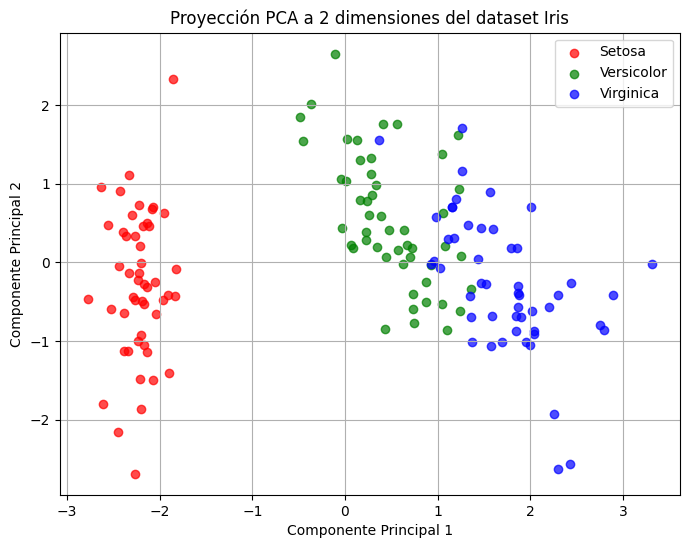

In [ ]:
import matplotlib.pyplot as plt

# Definimos los colores para cada especie
colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

# Creamos el gráfico de dispersión
plt.figure(figsize=(8, 6))
for variety in np.unique(y):
    plt.scatter(X_pca[y == variety, 0], X_pca[y == variety, 1],
                c=colors[variety], label=variety, alpha=0.7)

plt.title('Proyección PCA a 2 dimensiones del dataset Iris')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

#### 3. Análisis del dataset Tinyfaces con PCA

Las Eigenfaces son autovectores obtenidos de la matriz de covarianza de un conjunto de imágenes de rostros. Estos autovectores permiten representar las variaciones más importantes en los datos de las imágenes faciales y son ampliamente utilizados en tareas de reconocimiento facial.

Para este ejercicio, se utilizarán 112 imágenes en baja resolución (32x32 píxeles) extraídas de la base de datos Tinyface. El objetivo es calcular las primeras 12 Eigenfaces siguiendo un proceso detallado que incluye el preprocesamiento de las imágenes, la remoción de la media, el cálculo de la matriz de covarianza y la obtención de los autovectores.

##### a) **Lectura y vectorización de las imágenes**



Cada imagen será leída, convertida a escala de grises, redimensionada a 32x32 píxeles, y vectorizada (convertida en un vector de 1024 elementos). Esto producirá una matriz de 112 filas y 1024 columnas donde cada fila representa una imagen en formato vectorial.

In [ ]:
import os
import cv2
import numpy as np

# Definimos la ruta de las imágenes
image_folder = '/content/drive/MyDrive/doctorado/tesam/tp1/tinyface_20'
image_size = 32  # Tamaño máximo común: 32x32
num_images = 112  # Número de imágenes

# Inicializamos la matriz para almacenar las imágenes vectorizadas
images_matrix = np.zeros((num_images, image_size * image_size))

# Leemos y procesamos cada imagen
for i, image_name in enumerate(sorted(os.listdir(image_folder))):
    if image_name.endswith('.jpg'):
        img_path = os.path.join(image_folder, image_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convertimos a escala de grises
        img_resized = cv2.resize(img, (image_size, image_size))  # Redimensionamos a 32x32
        img_vectorized = img_resized.flatten()  # Vectorizamos la imagen
        images_matrix[i, :] = img_vectorized

# Inspeccionamos la matriz resultante
images_matrix.shape


(112, 1024)

Esto genera una matriz $ X \in \mathbb{R}^{112 \times 1024} $, donde cada fila representa una imagen de tamaño 32x32 convertida a un vector de 1024 píxeles.

##### b) **Remover la Media y Calcular la Matriz de Covarianza**

El siguiente paso es remover la media de cada pixel (equivalente a remover la imagen promedio) y luego calcular la matriz de covarianza. La media se remueve restando la imagen promedio a cada una de las imágenes.

La matriz de covarianza $ \Sigma $ es calculada como:

\[
\Sigma = \frac{1}{n-1} X_{\text{mean}}^T X_{\text{mean}}
\]

Donde \( X_{\text{mean}} \) es la matriz de imágenes con la media removida.

In [ ]:
# Remover la imagen promedio
mean_face = np.mean(images_matrix, axis=0)
images_centered = images_matrix - mean_face

# Calcular la matriz de covarianza
cov_matrix = np.cov(images_centered, rowvar=False)

# Inspeccionamos la matriz de covarianza
cov_matrix.shape


(1024, 1024)

##### c) **Cálculo de los 12 Autovectores**

Ahora se calculan los autovalores y autovectores de la matriz de covarianza. Seleccionamos los 12 autovectores correspondientes a los 12 autovalores más grandes, que representan las Eigenfaces.

In [ ]:
# Cálculo de autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Ordenamos los autovalores en orden descendente
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]  # Ordenamos los autovectores según los autovalores

# Seleccionamos los 12 primeros autovectores
eigenfaces = eigenvectors[:, :12]

# Inspeccionamos la matriz de Eigenfaces
eigenfaces.shape  # Debe ser (1024, 12)


(1024, 12)

##### d) **Gráfico de las Eigenfaces**

Finalmente, cada autovector de las Eigenfaces (de tamaño 1024) se transforma de nuevo en una matriz de 32x32 para visualizarla. Graficamos las 12 Eigenfaces en una cuadrícula de 4x3.

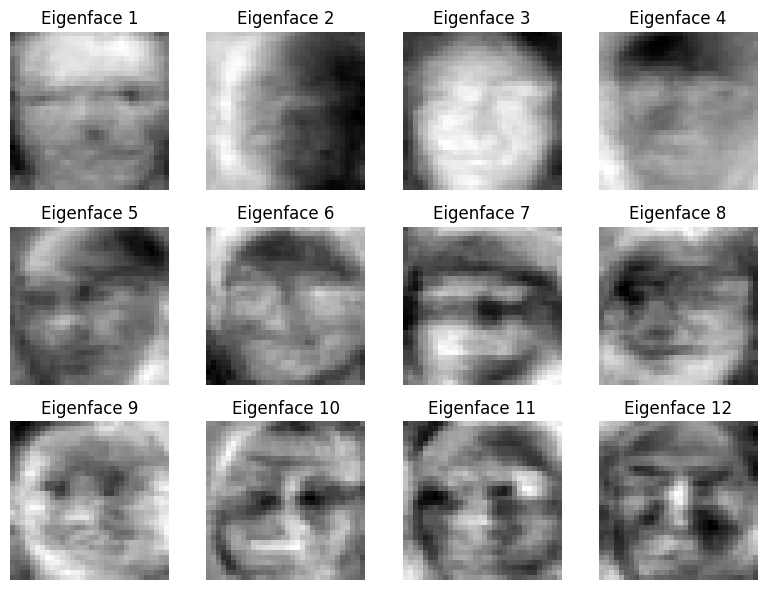

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura para graficar las Eigenfaces
fig, axes = plt.subplots(3, 4, figsize=(8, 6))
axes = axes.ravel()

for i in range(12):
    eigenface = eigenfaces[:, i].reshape((image_size, image_size))  # Convertimos el vector a 32x32
    axes[i].imshow(eigenface, cmap='gray')
    axes[i].set_title(f'Eigenface {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Las Eigenfaces obtenidas son los vectores de mayor varianza en el conjunto de imágenes de rostros. Estas son representaciones clave para capturar las características principales de las imágenes faciales. Las 12 Eigenfaces gráficas muestran las componentes fundamentales que describen las variaciones de las imágenes en baja resolución del conjunto Tinyface.

Este enfoque no solo reduce dimensionalidad, sino que permite una representación eficiente de los rostros, clave en tareas de reconocimiento facial y compresión de imágenes.

### **Ejercicio 4: Análisis estadístico de datos-ICA.**

El Análisis de Componentes Independientes (ICA) es una técnica para separar señales mezcladas, especialmente útil en señales no gaussianas. El algoritmo FastICA con aprendizaje deflacionario es uno de los métodos más populares para resolver el problema de separación ciega de fuentes (BSS). En este ejercicio, aplicaremos el algoritmo FastICA y analizaremos los resultados.

#### 1. **Implementación del Implemente el algoritmo de FastICA con aprendizaje deflacionario**.

El algoritmo *FastICA* es un método iterativo basado en la maximización de la no gaussianidad de las señales. El aprendizaje deflacionario implica que se extrae un componente independiente en cada iteración, y luego se continúa con las señales restantes. Se estima cada componente de manera secuencial, quitando la información de cada componente independiente una vez que ha sido estimada. Este algoritmo sigue los siguientes pasos:

1. **Inicialización:** Se inicializa un vector aleatorio $ w $ para encontrar una única componente independiente.
2. **Blanqueamiento (Whitening):** El objetivo es transformar las señales mezcladas para que las covarianzas de sus componentes sean iguales.
3. **Iteración:** El vector $ w $ se actualiza en cada iteración con la fórmula de FastICA:
   $$
   w \leftarrow E\{x g(w^T x)\} - E\{g'(w^T x)\} w
   $$
   Donde $ g $ es una función no lineal como $ \tanh $, y $ g' $ es su derivada.
4. **Ortogonalización:** Se ortogonaliza $ w $ con respecto a los vectores encontrados previamente para garantizar la independencia.
5. **Normalización:** Se normaliza $ w $ para que sea un vector unitario.

El proceso se repite hasta que convergen los vectores.

La versión deflacionaria de FastICA extrae una fuente independiente por iteración y, en cada paso, proyecta los datos en el espacio ortogonal a las fuentes ya encontradas.

In [ ]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

def fastica_deflation(X, tol=1e-5, max_iter=1000):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, n_features))

    for i in range(n_features):
        w = np.random.rand(n_features)

        for _ in range(max_iter):
            # Actualización de w
            w_new = np.dot(X.T, np.tanh(np.dot(X, w))) - np.mean(1 - np.tanh(np.dot(X, w)) ** 2) * w

            # Ortogonalización respecto a vectores anteriores
            if i > 0:
                w_new -= np.dot(W[:i].T, np.dot(W[:i], w_new))

            # Normalización
            w_new /= np.linalg.norm(w_new)

            # Criterio de convergencia
            if np.linalg.norm(w_new - w) < tol:
                break

            w = w_new

        W[i, :] = w

    return W

# Generamos mezclas de señales (detallado en el inciso 2)

In [ ]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Función para generar señales laplacianas
def generate_laplacian_sources(n_samples, random_state=0):
    np.random.seed(random_state)
    S = np.random.laplace(0, 1, (n_samples, 2))  # Dos fuentes laplacianas
    return S

# Función para mezclar las señales con una matriz de mezcla aleatoria
def mix_sources(S):
    A = np.random.randn(2, 2)  # Matriz de mezcla aleatoria
    X = np.dot(S, A.T)  # Mezclamos las señales
    return X, A

# Implementación del algoritmo FastICA con aprendizaje deflacionario
def apply_fastica(X):
    ica = FastICA(n_components=2, random_state=0)
    S_estimated = ica.fit_transform(X)  # Aplicamos FastICA
    W = ica.components_  # Matriz de separación W
    return S_estimated, W


#### 2. **Análisis con datos de dos mezclas.**

En este ejercicio, generamos dos fuentes independientes con una distribución Laplaciana y las mezclamos utilizando una matriz aleatoria. Luego, aplicamos el algoritmo FastICA para separar las señales y realizamos un análisis gráfico en cada etapa.

##### a) Para cada etapa (fuentes, mezclas, señales blanqueadas, señales separadas) dibuje un gráfico de dispersión de las variables.

1. **Fuentes:** Las dos fuentes independientes se generan con distribución Laplaciana.
2. **Mezclas:** Las mezclas son obtenidas multiplicando las fuentes por una matriz de mezcla $ A $.
3. **Señales blanqueadas (Whitened):** Las señales son blanqueadas para eliminar correlaciones y escalas diferentes.
4. **Señales separadas:** Las señales independientes obtenidas tras aplicar FastICA.

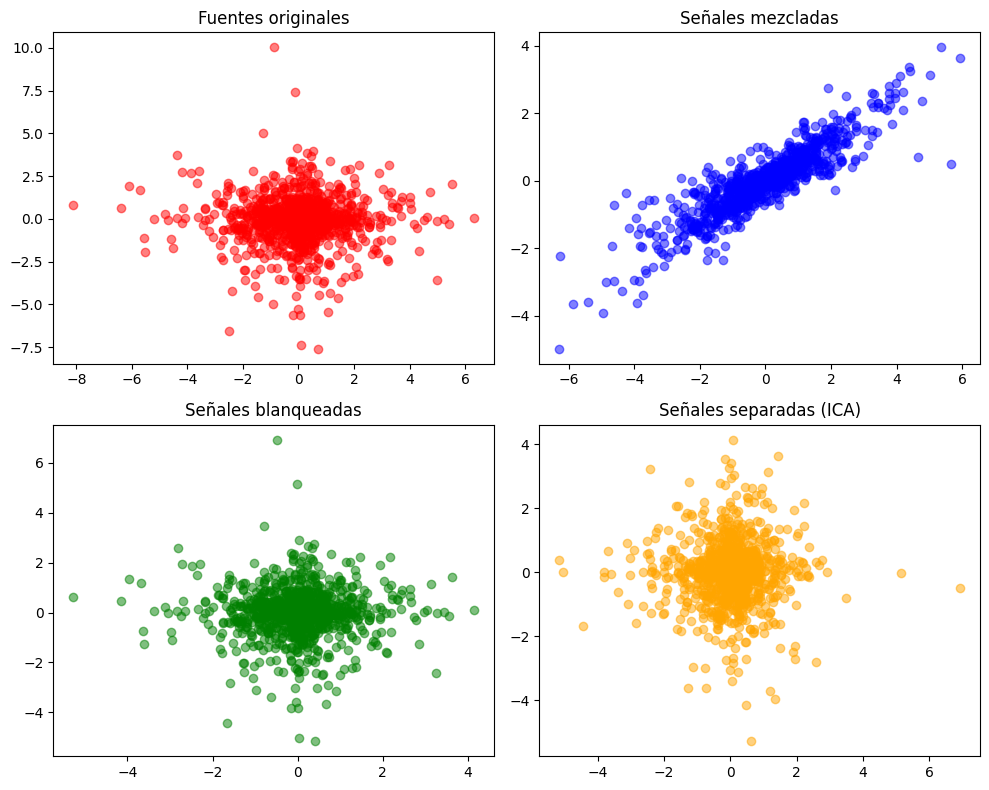

In [ ]:
# Generamos las dos fuentes con distribución Laplaciana
n_samples = 1000
s1 = np.random.laplace(0, 1, n_samples)  # Primera fuente
s2 = np.random.laplace(0, 1, n_samples)  # Segunda fuente
S = np.c_[s1, s2]

# Creamos la matriz de mezcla aleatoria A
A = np.random.rand(2, 2)

# Mezclamos las señales
X = S.dot(A.T)

# Graficamos las fuentes y las mezclas
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(s1, s2, alpha=0.5, c='r')
axs[0, 0].set_title('Fuentes originales')

axs[0, 1].scatter(X[:, 0], X[:, 1], alpha=0.5, c='b')
axs[0, 1].set_title('Señales mezcladas')

# Aplicamos blanqueamiento (whitening)
X_white = FastICA(whiten='unit-variance').fit_transform(X)

axs[1, 0].scatter(X_white[:, 0], X_white[:, 1], alpha=0.5, c='g')
axs[1, 0].set_title('Señales blanqueadas')

# Aplicamos FastICA
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Recuperamos las señales independientes
A_ = ica.mixing_  # Matriz de mezcla estimada

axs[1, 1].scatter(S_[:, 0], S_[:, 1], alpha=0.5, c='orange')
axs[1, 1].set_title('Señales separadas (ICA)')

plt.tight_layout()
plt.show()

Graficamos las 2 señales originales y las señales separadas por ICA.

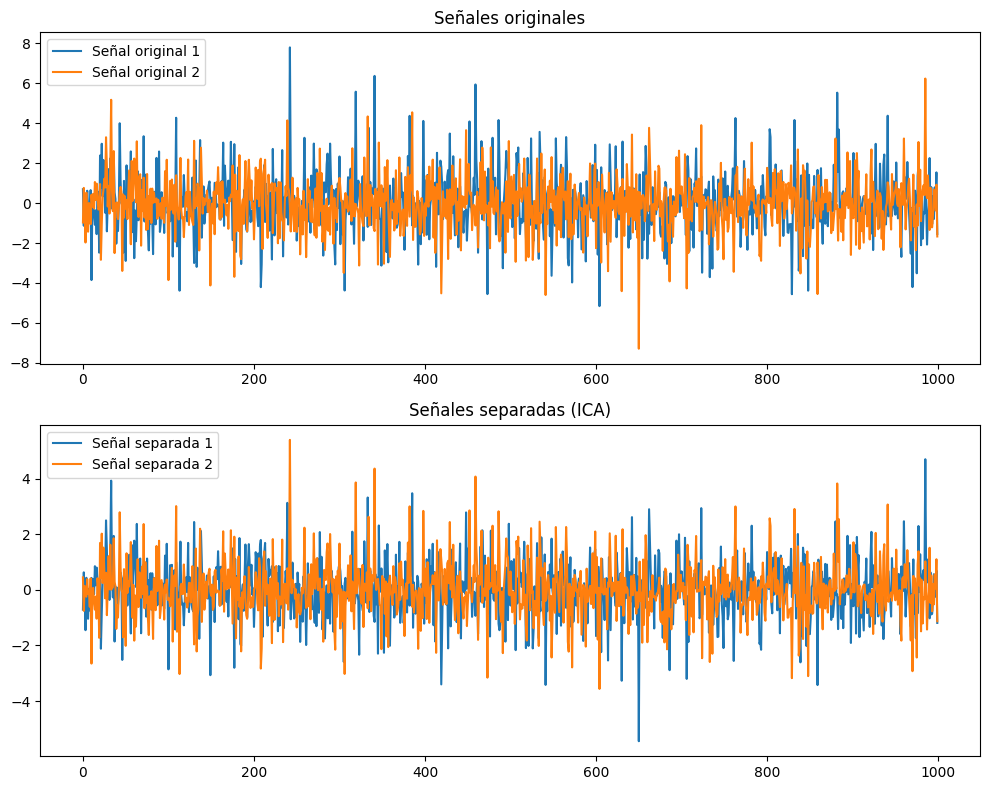

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(s1, label='Señal original 1')
axs[0].plot(s2, label='Señal original 2')
axs[0].set_title('Señales originales')
axs[0].legend()

axs[1].plot(S_[:, 0], label='Señal separada 1')
axs[1].plot(S_[:, 1], label='Señal separada 2')
axs[1].set_title('Señales separadas (ICA)')
axs[1].legend()

plt.tight_layout()
plt.show()




##### b) Estimación de las Matrices $ P$ y $ D$




La matriz de separación $ W $ se puede calcular como la inversa de la matriz de mezcla estimada $ A $. Las matrices $ P $ y $ D $ son las matrices de rotación y de escala obtenidas después de aplicar ICA.

$$
W = A^{-1}
$$

In [ ]:
# Matriz de separación estimada
W = np.linalg.inv(A_)
P = np.dot(A, W)
D = np.linalg.det(W)  # Determinante (escala) de la matriz

print("Matriz de Separación W:\n", W)
print("Matriz de Rotación P:\n", P)
print("Determinante (escala) D:", D)

Matriz de Separación W:
 [[ 1.32814648 -1.14702487]
 [-1.01153013  2.74177363]]
Matriz de Rotación P:
 [[-0.46325491  1.98477283]
 [ 0.15130849  0.47883563]]
Determinante (escala) D: 2.481226801949412


##### c) ¿Es $ W $ la inversa de $ A $?




Teóricamente, la matriz de separación $ W $ es la inversa de la matriz de mezcla $ A $ en condiciones ideales, donde las fuentes son verdaderamente independientes. La relación $ W = A^{-1} $ se cumple siempre que las fuentes sean independientes y no gaussianas.

##### d) Efecto de Ruido Gaussiano en el Modelo Generativo





Si se agrega una componente de ruido gaussiano al modelo generativo, la precisión de la separación disminuirá. El ruido añade componentes no estructuradas que FastICA no puede modelar fácilmente. Como consecuencia, la matriz $ W $ ya no será una buena aproximación a $ A^{-1} $, y las señales separadas tendrán más ruido.

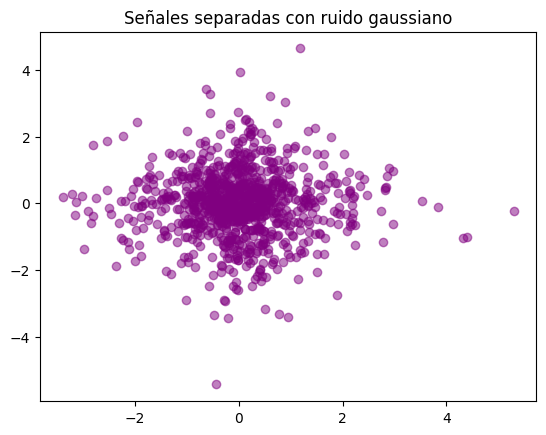

In [ ]:
# Agregamos ruido gaussiano
noise = 0.05 * np.random.normal(size=X.shape)
X_noisy = X + noise

# Aplicamos FastICA con las señales ruidosas
S_noisy = ica.fit_transform(X_noisy)

# Graficamos las señales separadas con ruido
plt.scatter(S_noisy[:, 0], S_noisy[:, 1], alpha=0.5, c='purple')
plt.title('Señales separadas con ruido gaussiano')
plt.show()

##### e) Efecto de Fuentes Gaussianas



Si una de las fuentes es gaussiana, ICA tendrá dificultades para separar las señales, ya que la gaussianidad implica que la señal no contiene características que permitan identificar su independencia. ICA se basa en la no gaussianidad para realizar la separación. Si ambas fuentes son gaussianas, ICA no podrá separarlas efectivamente, y el modelo fallará en encontrar una matriz $ W $ adecuada.

El método de FastICA es efectivo para separar señales siempre y cuando las fuentes sean no gaussianas. El ruido gaussiano afecta la calidad de la separación, y en el caso de fuentes gaussianas, el modelo no puede realizar la separación debido a la falta de no gaussianidad, que es la propiedad clave que aprovecha ICA.

### **Ejercicio 5: Aprendizaje por refuerzo.**

Para estudiar y validar el comportamiento de los algoritmos de aprendizaje por refuerzo pasivo se proponen los siguientes ejercicios de lápiz y papel en un “problema de juguete”:

#### 1.  **Encontrar la política óptima para un agente pasivo en el mundo de 4x3 de la Figura 1, con recompensa -0.04 en los estados no terminales.** En la Fig. 2 se pueden observar ejemplos de políticas posibles para este problema.

En este mundo de 4x3 (ver Figura 1):
- Los estados terminales tienen recompensas de +1 en la celda (4,3) y -1 en la celda (4,2).
- Todos los demás estados tienen una recompensa de -0.04, que representa un costo por movimiento.
- La celda (2,2) está bloqueada y no se puede atravesar.

El objetivo es encontrar la **política óptima**, es decir, la mejor acción en cada estado para maximizar la recompensa total esperada. En otras palabras, buscamos el camino que maximice la utilidad a largo plazo y evite estados con bajas recompensas.

**Estrategia para la Política Óptima**
Dado que el agente debe evitar el estado de -1 (4,2) y acercarse al estado de \+1 (4,3), una política óptima:
1. **Dirigirá al agente hacia la derecha** si está a la izquierda de (4,3).
2. **Dirigirá al agente hacia arriba o abajo** si está debajo o encima de (4,3).
3. **Evitaremos movernos hacia (4,2)** en cualquier situación.

Esto nos lleva a la siguiente política:
- **Camino 1** (Ejemplo positivo): (1,1) → (1,2) → (1,3) → (2,3) → (3,3) → (4,3)
- **Camino 2** (Ejemplo negativo): (1,1) → (2,1) → (3,1) → (3,2) → (4,2)

Como se observa en la Figura 2, el **Camino 1** llega al estado de recompensa \( +1 \), mientras que el **Camino 2** lleva al estado de \( -1 \). Por lo tanto, la política óptima evita el **Camino 2** y prioriza el **Camino 1**.



#### 2.  **Calcular las utilidades de los estados en el mundo de 4x3, dada la política óptima encontrada en el ejercicio anterior.**

Utilizaremos la **ecuación de Bellman** para iterar los valores de cada estado hasta que estos converjan. La ecuación es:

$$ U(s) = R(s) + \gamma \max_{a} \sum_{s'} P(s'|s,a) U(s') $$

donde:
- $U(s)$ es la utilidad del estado actual s.
- $R(s)$ es la recompensa del estado s.
- $\gamma$ es el factor de descuento, que aquí usaremos como $\gamma = 0.9$.
- $P(s'|s,a)$ es la probabilidad de transición hacia el siguiente estado $s'$ dada la acción a. En este caso, es determinista (probabilidad de 1 hacia el siguiente estado en la política).

**Cálculo de las Utilidades de Algunos Estados**

1. **Estados Terminales**:
   - **(4,3)**: Este estado tiene una recompensa de \( +1 \). Su utilidad es:
     $$ U(4,3) = +1 $$
   - **(4,2)**: Este estado tiene una recompensa de \( -1 \). Su utilidad es:
     $$
     U(4,2) = -1
     $$

2. **Estados No Terminales**:
   Para el resto de los estados, se calcula la utilidad iterativamente usando la política óptima y la ecuación de Bellman. A continuación, calculamos algunos ejemplos:

   - **Celda (3,3)**:
     $$
     U(3,3) = -0.04 + 0.9 \times U(4,3)
     $$
     Sustituyendo \( U(4,3) = +1 \):
     $$
     U(3,3) = -0.04 + 0.9 \times 1 = -0.04 + 0.9 = 0.86
     $$

   - **Celda (3,2)**:
     $$
     U(3,2) = -0.04 + 0.9 \times U(4,2)
     $$
     Sustituyendo \( U(4,2) = -1 \):
     $$
     U(3,2) = -0.04 + 0.9 \times (-1) = -0.04 - 0.9 = -0.94
     $$

   - **Celda (2,3)**:
     $$
     U(2,3) = -0.04 + 0.9 \times U(3,3)
     $$
     Usando el valor aproximado de \( U(3,3) = 0.86 \):
     $$
     U(2,3) = -0.04 + 0.9 \times 0.86 = -0.04 + 0.774 = 0.734
     $$

   Continuamos este proceso para cada estado hasta que los valores de utilidad converjan (cambios entre iteraciones son insignificantes).

**Resultado Final**
Después de suficientes iteraciones, los valores de utilidad convergen y se obtiene el siguiente mapa de utilidades (como en la última figura que compartiste):

$$
\begin{array}{|c|c|c|c|}
\hline
0.705 & 0.655 & 0.611 & 0.388 \\
0.762 & \text{(bloqueado)} & 0.660 & -1 \\
0.812 & 0.868 & 0.912 & +1 \\
\hline
\end{array}
$$

1. **Política Óptima**: La política óptima sigue el camino que maximiza la utilidad esperada hacia el estado +1 en (4,3), evitando el estado -1 en (4,2).
2. **Utilidades de los Estados**: Las utilidades fueron calculadas mediante iteraciones, reflejando las recompensas y penalizaciones en el entorno, y proporcionando una guía clara para maximizar el beneficio a largo plazo.

Esta solución paso a paso muestra cómo cada estado se evalúa y ajusta hasta alcanzar las utilidades finales en el mundo de 4x3.

### **Ejercicio 6: Aprendizaje basado en redes y algoritmos clásicos.**

#### 1.  **Genere un conjunto de datos aleatorios bidimensionales separados en dos clases gaussianas correlacionadas con cierto grado de solapamiento.**

Para generar un conjunto de datos bidimensionales separados en dos clases gaussianas correlacionadas con cierto grado de solapamiento, utilizamos Python junto con las bibliotecas `numpy` y `matplotlib` para la generación y visualización de los datos.

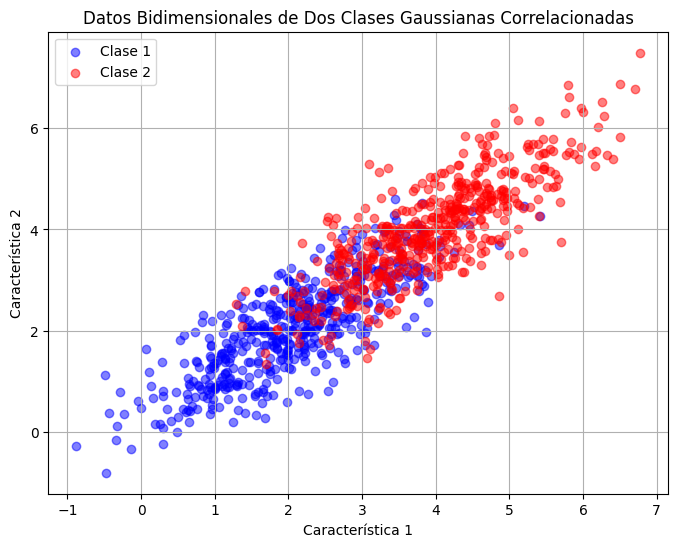

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para la primera clase gaussiana
mean1 = [2, 2]  # Media de la clase 1
cov1 = [[1, 0.8], [0.8, 1]]  # Matriz de covarianza (introduce correlación)

# Parámetros para la segunda clase gaussiana
mean2 = [4, 4]  # Media de la clase 2
cov2 = [[1, 0.8], [0.8, 1]]  # Matriz de covarianza similar para mantener correlación

# Número de muestras por clase
n_samples = 500

# Generar datos para la clase 1
class1 = np.random.multivariate_normal(mean1, cov1, n_samples)

# Generar datos para la clase 2
class2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# Crear etiquetas para cada clase (opcional, si necesitas etiquetar los datos)
labels_class1 = np.zeros(n_samples)
labels_class2 = np.ones(n_samples)

# Combinar datos y etiquetas si es necesario
X = np.vstack((class1, class2))
y = np.hstack((labels_class1, labels_class2))

# Visualizar los datos
plt.figure(figsize=(8, 6))
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Clase 1', alpha=0.5)
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Clase 2', alpha=0.5)
plt.title('Datos Bidimensionales de Dos Clases Gaussianas Correlacionadas')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()

- **Medias y Covarianzas:** Definimos las medias (`mean1`, `mean2`) y las matrices de covarianza (`cov1`, `cov2`) para cada clase. Las matrices de covarianza no son diagonales, lo que introduce correlación entre las características.

- **Generación de Datos:** Utilizamos `np.random.multivariate_normal` para generar muestras aleatorias de una distribución normal multivariante.

- **Etiquetas:** Creamos etiquetas para cada clase si es necesario para futuras tareas de clasificación.

Las medias y las matrices de covarianza se pueden ajustar para controlar el grado de solapamiento y la correlación entre las variables.


#### 2.  **Implemente el algoritmo de entrenamiento de un perceptron simple y pruébelo con los datos anteriores, grafique los resultados obtenidos.**

Para implementar el algoritmo de entrenamiento de un perceptrón simple y probarlo con los datos generados anteriormente, podemos seguir los siguientes pasos:

1. **Definir el perceptrón simple:**
   Implementar una clase o función que represente el perceptrón, incluyendo los métodos para el entrenamiento y la predicción.

2. **Entrenar el perceptrón con los datos:**
   Utilizar los datos generados en el ejercicio anterior para entrenar el modelo.

3. **Visualizar los resultados:**
   Graficar los datos junto con la frontera de decisión obtenida después del entrenamiento.


Precisión del perceptrón: 53.60%


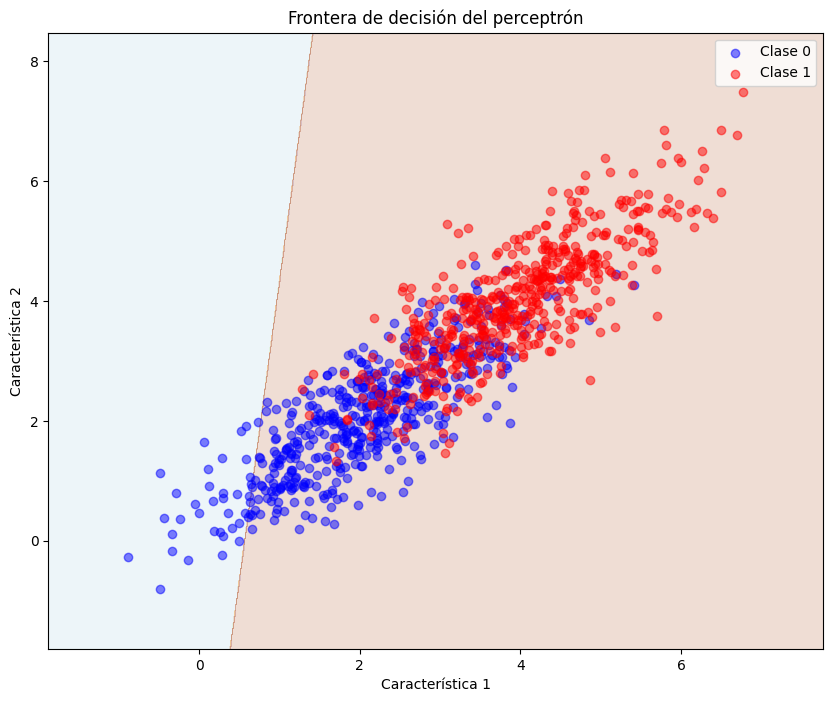

In [2]:
# Paso 2: Implementar el perceptrón simple

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_function
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Inicializar parámetros
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convertir etiquetas a -1 y 1
        y_ = np.where(y <= 0, -1, 1)

        # Entrenamiento
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Actualización de pesos y sesgo
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_function(self, x):
        return np.where(x >= 0, 1, -1)

# Paso 3: Entrenar el perceptrón con los datos

# Crear una instancia del perceptrón
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)

# Entrenar el modelo
perceptron.fit(X, y)

# Predecir las etiquetas
predictions = perceptron.predict(X)

# Convertir las etiquetas de -1 y 1 a 0 y 1
predictions = np.where(predictions == -1, 0, 1)

# Calcular la precisión del modelo
accuracy = np.sum(predictions == y) / len(y)
print(f'Precisión del perceptrón: {accuracy*100:.2f}%')

# Paso 4: Graficar los resultados

# Definir una función para graficar la frontera de decisión
def plot_decision_boundary(X, y, model):
    # Crear una malla de puntos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    resolution = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predecir sobre la malla de puntos
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = np.where(Z == -1, 0, 1)
    Z = Z.reshape(xx.shape)

    # Graficar el contorno y los puntos
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
    plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Clase 0', alpha=0.5)
    plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Clase 1', alpha=0.5)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Frontera de decisión del perceptrón')
    plt.legend()
    plt.show()

# Llamar a la función para graficar
plot_decision_boundary(X, y, perceptron)



- **Implementación del Perceptrón:**
  - La clase `Perceptron` incluye métodos para entrenar (`fit`) y predecir (`predict`).
  - Se utiliza una función de activación escalón (`_unit_step_function`).
  - Durante el entrenamiento, los pesos y el sesgo se actualizan en cada muestra utilizando la regla de aprendizaje del perceptrón.

- **Entrenamiento del Modelo:**
  - Convertimos las etiquetas de 0 y 1 a -1 y 1 para facilitar el cálculo.
  - Entrenamos el perceptrón con los datos combinados `X` y `y`.
  - Calculamos la precisión para evaluar el rendimiento del modelo.

- **Visualización de la Frontera de Decisión:**
  - Creamos una malla de puntos que cubre el espacio de características.
  - Predecimos las etiquetas para cada punto de la malla.
  - Graficamos la frontera de decisión utilizando `plt.contourf`.
  - Superponemos los datos originales para visualizar cómo el perceptrón separa las clases.

Si las clases son linealmente separables o casi separables, el perceptrón debería encontrar una frontera de decisión que las separe razonablemente. Ademas, dado que las clases tienen cierto grado de solapamiento, es posible que el perceptrón no alcance una precisión del 100%.

#### **3. Implemente el algoritmo de aprendizaje no supervisado k-medias (batch) y pruébelo con los datos anteriores, grafique los resultados obtenidos.**

**Implementacion del algoritmo k-medias (k-means)**

1. **Inicialización:** Seleccionar aleatoriamente `k` centroides iniciales.
2. **Asignación de clusters:** Asignar cada punto de datos al centroide más cercano.
3. **Actualización de centroides:** Calcular la nueva posición de cada centroide como la media de los puntos asignados a él.
4. **Repetir:** Repetir los pasos 2 y 3 hasta que los centroides no cambien significativamente o se alcance un número máximo de iteraciones.



In [3]:
import numpy as np

class KMeans:
    def __init__(self, k=2, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol  # Tolerancia para determinar la convergencia
        self.centroids = None
        self.clusters = None

    def fit(self, X):
        # Inicialización aleatoria de los centroides
        np.random.seed(42)
        random_indices = np.random.permutation(X.shape[0])
        self.centroids = X[random_indices[:self.k]]

        for i in range(self.max_iters):
            # Asignar puntos al centroide más cercano
            self.clusters = self._assign_clusters(X)

            # Guardar los centroides anteriores
            centroids_old = self.centroids.copy()

            # Calcular nuevos centroides
            self.centroids = self._calculate_centroids(X)

            # Verificar convergencia
            diff = np.linalg.norm(self.centroids - centroids_old)
            if diff < self.tol:
                print(f'Convergencia alcanzada en la iteración {i+1}')
                break

    def _assign_clusters(self, X):
        clusters = []
        for x in X:
            distances = [np.linalg.norm(x - centroid) for centroid in self.centroids]
            closest_centroid = np.argmin(distances)
            clusters.append(closest_centroid)
        return np.array(clusters)

    def _calculate_centroids(self, X):
        centroids = []
        for idx in range(self.k):
            cluster_points = X[self.clusters == idx]
            if len(cluster_points) > 0:
                centroid = np.mean(cluster_points, axis=0)
            else:
                # Reasignar centroide si no tiene puntos asignados
                centroid = X[np.random.choice(range(X.shape[0]))]
            centroids.append(centroid)
        return np.array(centroids)

    def predict(self, X):
        clusters = self._assign_clusters(X)
        return clusters

- **Inicialización:**
  - Seleccionamos `k` puntos aleatorios del conjunto de datos como centroides iniciales.
  - Utilizamos una semilla (`np.random.seed(42)`) para reproducibilidad.
  
- **Asignación de clusters (`_assign_clusters`):**
  - Para cada punto `x` en `X`, calculamos la distancia a cada centroide.
  - Asignamos el punto al centroide más cercano.

- **Actualización de centroides (`_calculate_centroids`):**
  - Para cada cluster, calculamos el nuevo centroide como la media de los puntos asignados a él.
  - Si un centroide no tiene puntos asignados, seleccionamos aleatoriamente un nuevo punto del conjunto de datos.

- **Convergencia:**
  - Verificamos la convergencia calculando la norma de la diferencia entre los centroides actuales y los anteriores.
  - Si la diferencia es menor que una tolerancia (`tol`), detenemos el algoritmo.

**Entrenamiento del modelo k-means con los datos**

Ahora aplicaremos el algoritmo k-means a los datos generados y analizaremos los resultados.




In [4]:
# Crear una instancia del algoritmo k-means
kmeans = KMeans(k=2, max_iters=100)

# Entrenar el modelo
kmeans.fit(X)

# Obtener las etiquetas predichas
clusters_pred = kmeans.predict(X)

Convergencia alcanzada en la iteración 13


**Grafica de los resultados**

Visualizaremos los datos junto con los clusters asignados y los centroides finales.



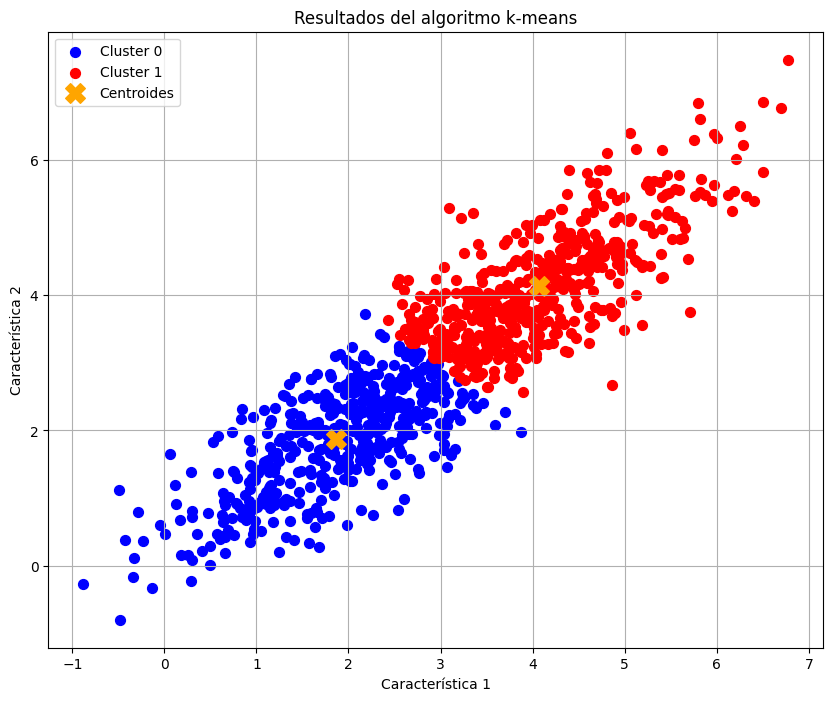

In [5]:
# Función para graficar los clusters y los centroides
def plot_clusters(X, clusters, centroids):
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black']

    for idx in range(kmeans.k):
        points = X[clusters == idx]
        plt.scatter(points[:, 0], points[:, 1], s=50, color=colors[idx], label=f'Cluster {idx}')

    # Graficar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='orange', marker='X', label='Centroides')

    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Resultados del algoritmo k-means')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar
plot_clusters(X, clusters_pred, kmeans.centroids)

El color de los clusters puede no coincidir con las clases originales, ya que k-means es un algoritmo no supervisado y no tiene información sobre las etiquetas verdaderas.



**Evaluación y discusión los resultados**


In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Como los números de los clusters son arbitrarios, podemos mapearlos a las etiquetas verdaderas
# Crear un mapeo entre clusters y etiquetas verdaderas
def map_clusters_to_labels(clusters, true_labels):
    from scipy.stats import mode
    labels = np.zeros_like(clusters)
    for cluster in np.unique(clusters):
        mask = (clusters == cluster)
        labels[mask] = mode(true_labels[mask])[0]
    return labels

# Mapear clusters a etiquetas
mapped_labels = map_clusters_to_labels(clusters_pred, y)

# Calcular precisión
accuracy = accuracy_score(y, mapped_labels)
print(f'Precisión del clustering: {accuracy*100:.2f}%')

# Mostrar matriz de confusión
cm = confusion_matrix(y, mapped_labels)
print('Matriz de confusión:')
print(cm)

Precisión del clustering: 83.80%
Matriz de confusión:
[[412  88]
 [ 74 426]]


#### **4. Implemente el algoritmo de aprendizaje de las redes neuronales con funciones de base radial y pruébelo con los datos anteriores, grafique los resultados obtenidos.**

Implementacion de una red RBF:

1. **Seleccionar los centros de las funciones de base radial:** Podemos seleccionar los centros utilizando algoritmos de clustering como k-means.
   
2. **Calcular los anchos (sigma) de las funciones gaussianas:** Podemos utilizar la distancia media entre los centros o un valor fijo.
   
3. **Calcular la matriz de activación (phi):** Aplicar las funciones gaussianas a los datos de entrada.
   
4. **Entrenar los pesos de la capa de salida:** Resolver un problema de regresión lineal (podemos usar la pseudoinversa).




In [7]:
from sklearn.cluster import KMeans

# Paso 1: Seleccionar los centros utilizando k-means
k = 10  # Número de neuronas en la capa oculta (número de centros)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
centers = kmeans.cluster_centers_

# Paso 2: Calcular los anchos (sigma) de las funciones gaussianas
# Calculamos la distancia máxima entre los centros y usamos esa distancia para calcular sigma
d_max = np.max([np.linalg.norm(c1 - c2) for c1 in centers for c2 in centers])
sigma = d_max / np.sqrt(2 * k)

# También podemos calcular un sigma diferente para cada centro (opcional)
def calculate_sigma(centers, k):
    distances = []
    for i in range(len(centers)):
        for j in range(len(centers)):
            if i != j:
                distances.append(np.linalg.norm(centers[i] - centers[j]))
    d_max = np.max(distances)
    sigma = d_max / np.sqrt(2 * k)
    return sigma

sigma = calculate_sigma(centers, k)

# Paso 3: Calcular la matriz de activación (phi)
def gaussian_rbf(x, c, s):
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * s**2))

# Construir la matriz phi
def calculate_phi(X, centers, sigma):
    phi = np.zeros((X.shape[0], len(centers)))
    for i, x in enumerate(X):
        for j, c in enumerate(centers):
            phi[i, j] = gaussian_rbf(x, c, sigma)
    return phi

phi = calculate_phi(X, centers, sigma)

# Paso 4: Entrenar los pesos de la capa de salida
# Añadimos un término de sesgo (bias)
phi_with_bias = np.hstack((np.ones((phi.shape[0], 1)), phi))

# Convertir las etiquetas a formato one-hot encoding
# Como tenemos dos clases, podemos usar 0 y 1 directamente
# Pero para generalidad, usamos one-hot encoding
y_one_hot = np.zeros((y.size, 2))
y_one_hot[np.arange(y.size), y.astype(int)] = 1

# Resolver los pesos utilizando la pseudoinversa
# w = (phi.T * phi)^-1 * phi.T * y
weights = np.linalg.pinv(phi_with_bias).dot(y_one_hot)

**Explicación:**

- **Selección de centros:**
  - Utilizamos k-means para encontrar `k` centros en los datos.
  
- **Cálculo de sigma:**
  - Utilizamos la distancia máxima entre los centros para calcular un valor global de sigma.
  - Opcionalmente, podríamos calcular un sigma individual para cada centro.

- **Cálculo de phi:**
  - La matriz `phi` contiene las activaciones de las funciones gaussianas para cada punto de datos.
  
- **Entrenamiento de pesos:**
  - Usamos la pseudoinversa para resolver los pesos que mejor aproximan las salidas deseadas.
  - Añadimos un término de sesgo (bias) concatenando una columna de unos a `phi`.



**Paso 3: Hacer predicciones con la red RBF**

Ahora que tenemos los pesos entrenados, podemos usar la red para hacer predicciones sobre los datos.




In [8]:
def predict(X, centers, sigma, weights):
    # Calcular phi para los datos de entrada
    phi = calculate_phi(X, centers, sigma)
    phi_with_bias = np.hstack((np.ones((phi.shape[0], 1)), phi))
    # Calcular la salida
    y_pred = phi_with_bias.dot(weights)
    # La salida es probabilística, aplicamos softmax (opcional)
    y_pred = np.exp(y_pred) / np.sum(np.exp(y_pred), axis=1, keepdims=True)
    # Tomar la clase con la probabilidad más alta
    y_pred_labels = np.argmax(y_pred, axis=1)
    return y_pred_labels

# Predecir las etiquetas
y_pred = predict(X, centers, sigma, weights)

**Paso 4: Evaluar el modelo**

Podemos calcular la precisión del modelo y mostrar la matriz de confusión.



In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calcular precisión
accuracy = accuracy_score(y, y_pred)
print(f'Precisión de la red RBF: {accuracy*100:.2f}%')

# Mostrar matriz de confusión
cm = confusion_matrix(y, y_pred)
print('Matriz de confusión:')
print(cm)

Precisión de la red RBF: 83.90%
Matriz de confusión:
[[413  87]
 [ 74 426]]


**Paso 5: Graficar los resultados**

Para visualizar cómo la red RBF clasifica los datos, podemos graficar la frontera de decisión y los puntos de datos.




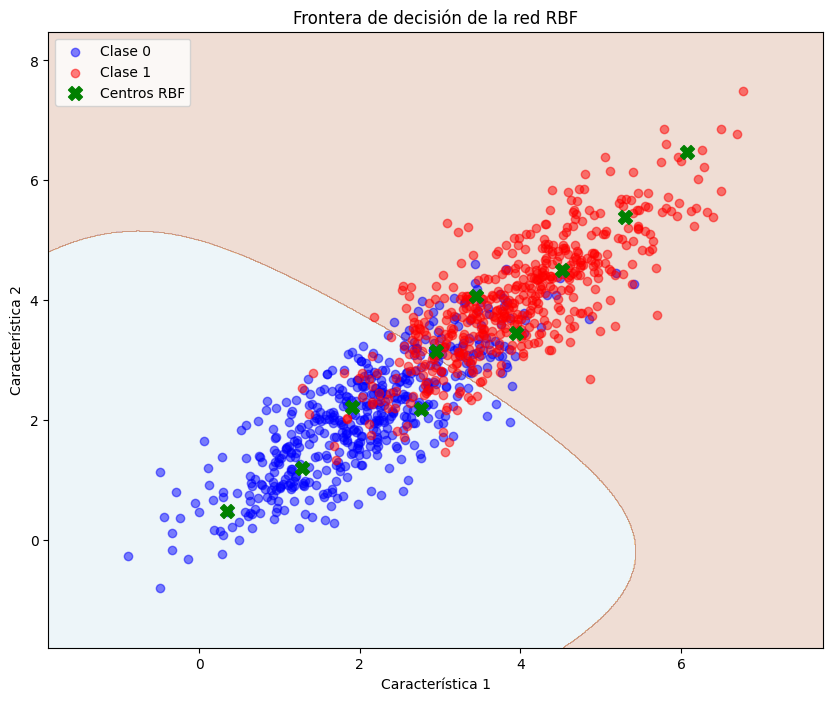

In [10]:
# Función para graficar la frontera de decisión
def plot_decision_boundary_rbf(X, y, model, centers, sigma, weights):
    # Crear una malla de puntos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    resolution = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predecir sobre la malla de puntos
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict(grid, centers, sigma, weights)
    Z = Z.reshape(xx.shape)

    # Graficar el contorno y los puntos
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)

    # Graficar los datos originales
    plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Clase 0', alpha=0.5)
    plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Clase 1', alpha=0.5)

    # Graficar los centros
    plt.scatter(centers[:, 0], centers[:, 1], s=100, color='green', marker='X', label='Centros RBF')

    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Frontera de decisión de la red RBF')
    plt.legend()
    plt.show()

# Llamar a la función para graficar
plot_decision_boundary_rbf(X, y, predict, centers, sigma, weights)

- Los puntos de datos correspondientes a cada clase (azul y rojo).
- La frontera de decisión aprendida por la red RBF (áreas sombreadas).
- Los centros de las funciones de base radial (marcadores "X" verdes).

La red RBF es capaz de modelar fronteras de decisión no lineales, lo que puede mejorar la clasificación en conjuntos de datos donde las clases no son linealmente separables. Los centros de las funciones RBF actúan como "prototipos" que capturan patrones locales en los datos. El número de neuronas en la capa oculta (`k`) afecta la complejidad del modelo:
  - Un valor pequeño de `k` puede llevar a un modelo subajustado.
  - Un valor muy grande de `k` puede llevar a sobreajuste y aumentar el costo computacional.



#### **5. Implemente el algoritmo de los k-vecinos más cercanos y pruébelo con los datos anteriores, grafique los resultados obtenidos.**

El algoritmo k-NN es un método de clasificación que asigna a cada punto la etiqueta más común entre sus k vecinos más cercanos. Los pasos clave son:

1. **Cálculo de distancias:** Para un punto dado, calcular la distancia a todos los puntos en el conjunto de entrenamiento.

2. **Encontrar los k vecinos más cercanos:** Seleccionar los k puntos con las distancias más pequeñas.

3. **Asignar la etiqueta:** La etiqueta asignada al punto es la etiqueta más frecuente entre sus k vecinos más cercanos.

Implementaremos una clase `KNNClassifier` que incluye métodos para entrenar y predecir.



In [11]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        # El modelo k-NN simplemente almacena los datos de entrenamiento
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # Predecir las etiquetas para los datos de entrada X
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Calcular las distancias entre x y todos los puntos de entrenamiento
        distances = np.linalg.norm(self.X_train - x, axis=1)
        # Obtener los índices de los k vecinos más cercanos
        k_indices = distances.argsort()[:self.k]
        # Obtener las etiquetas de los k vecinos más cercanos
        k_nearest_labels = self.y_train[k_indices]
        # Determinar la etiqueta más común
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

- **Clase `KNNClassifier`:** Esta clase encapsula el modelo k-NN.

- **Método `fit`:** En k-NN, el entrenamiento consiste en almacenar los datos de entrenamiento.

- **Método `predict`:** Para cada punto en `X`, llama al método `_predict`.

- **Método `_predict`:** Calcula las distancias del punto `x` a todos los puntos de entrenamiento, encuentra los k vecinos más cercanos, obtiene sus etiquetas y devuelve la etiqueta más común.

**Entrenar y probar el modelo k-NN**

Ahora, entrenaremos el modelo k-NN con los datos de entrenamiento y realizaremos predicciones.


In [12]:
# Crear una instancia del clasificador k-NN con k=5 (puedes ajustar este valor)
k = 5
knn = KNNClassifier(k=k)

# Entrenar el modelo (almacena los datos de entrenamiento)
knn.fit(X, y)

# Predecir las etiquetas para los datos de entrada (usamos el mismo conjunto para simplificar)
y_pred = knn.predict(X)

**Evaluar el modelo**

Calcularemos la precisión del modelo y mostraremos la matriz de confusión.

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calcular precisión
accuracy = accuracy_score(y, y_pred)
print(f'Precisión del clasificador k-NN: {accuracy*100:.2f}%')

# Mostrar matriz de confusión
cm = confusion_matrix(y, y_pred)
print('Matriz de confusión:')
print(cm)

Precisión del clasificador k-NN: 86.70%
Matriz de confusión:
[[431  69]
 [ 64 436]]


**Graficar los resultados**

Para visualizar cómo el modelo k-NN clasifica los datos, graficaremos la frontera de decisión y los puntos de datos.

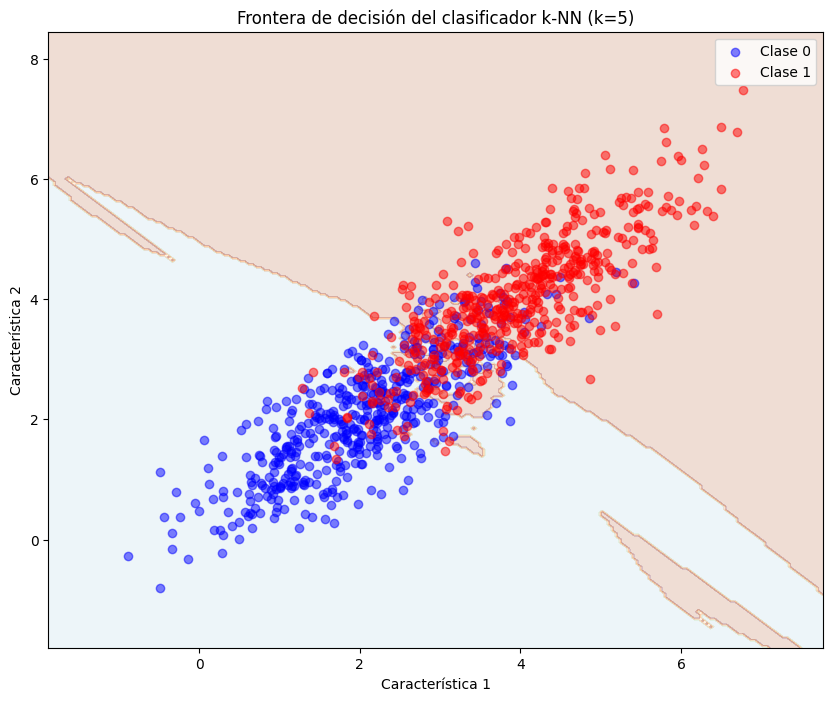

In [14]:
# Función para graficar la frontera de decisión
def plot_decision_boundary_knn(X, y, model, k):
    # Crear una malla de puntos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.05  # Paso en la malla
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecir sobre la malla de puntos
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Graficar el contorno y los puntos
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)

    # Graficar los datos originales
    plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Clase 0', alpha=0.5)
    plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Clase 1', alpha=0.5)

    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title(f'Frontera de decisión del clasificador k-NN (k={k})')
    plt.legend()
    plt.show()

# Llamar a la función para graficar
plot_decision_boundary_knn(X, y, knn, k)

La gráfica muestra los puntos de datos de cada clase (azul y rojo) y la frontera de decisión aprendida por el modelo k-NN (áreas sombreadas).

El clasificador k-NN es capaz de modelar fronteras de decisión no lineales y adaptarse a la estructura de los datos. El valor de `k` afecta la suavidad de la frontera de decisión:
  - Un `k` pequeño (por ejemplo, `k=1`) puede llevar a un modelo muy sensible al ruido (sobreajuste).
  - Un `k` grande puede suavizar demasiado la frontera y no capturar la complejidad de los datos.
